---

<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# The BIG Fish
**Finding the US coastal City and then Neighborhood for Seafood Restaurant Chain!**

> #### **Week 2**<br>
>**Applied Data Science Capstone**: Battle of the Neighborhoods<br>
>**IBM Data Science Professional Certificate**: Final Course

---

## Table of Contents:
<a id='Table'></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. <strong><h3>Part 1 - Choosing a COASTAL CITY in the United States of America by:</h3></strong><br>

    <strong>Statistically:</strong><br> 
    
    <h5>1.1 <a href="#item1">Highest Population:</a></h5>
    
    <h5>1.2 <a href="#item2">Highest-HIGH temperatures throughout the year</a></h5>
    
    <ul><li><h5><a href="#item3">How do the seasons compare between the USA and South Africa?</a></h5></li></ul>
    
    <h5>1.3 <a href="#item4">Highest-LOW temperatures throughout the year</a></h5>
    
    <ul><li><h5><a href="#item5">How do the seasons compare between the USA and South Africa?</a></h5></li></ul>
    
    <h5>1.4 <a href="#item6">RESULT - City statistically derived</a></h5><br>    
    
2. <strong><h3>Part 2 - Choosing the NEIGHBORHOOD in the coastal city with most</h3><br></strong>1st Seafood and,<br>2nd Sushi restaurants:<br><br>
    
    <strong>k-Means Clustering - Unsupervised Machine Learning Algorithm:</strong><br>

    <h5>2.1 <a href="#item7">Download and Explore . Json Dataset</a></h5>

    <h5>2.2 <a href="#item8">FourSquare API use</a></h5>

    <h5>2.3 <a href="#item9">Exploring Neighborhoods</a></h5>

    <h5>2.4 <a href="#item10">Selecting the optimal number of clusters</a></h5>
    
    <ul><li><h5><a href="#item11">The Elbow Method</a></h5></li></ul> 
    
    <ul><li><h5><a href="#item12">The Silhouette Method</a></h5></li></ul>
    
    <ul><li><h5><a href="#item13">Gap Statistics Method</a></h5></li></ul>

    <h5>2.5 <a href="#item14">k-Means Clustering - Unsupervised Machine Learning Algorithm</a></h5>  
    
    <h5>2.6 <a href="#item15">Visualize the clusters</a></h5>
    
    <h5>2.7 <a href="#item16">Scrutinize the clusters</a></h5><br>

3. <strong><h3>Part 3 - Synopsis:</h3></strong>
    
    <h5>3.1 <a href="#item17">Synopsis</a></h5>
    
    <h5>3.2 <a href="#item18">SUMMARY: <strong>The WINNER of the Battle of the Neighborhoods</strong></a></h5>
    
</div>

---

Installation necessary packages and importing of libraries:

In [2]:
# Install necessary packages for scraping
! pip install lxml
! pip install html5lib
! pip install BeautifulSoup4
! pip install pandas==0.23.0
! pip install numexpr==2.4.6
! pip install geopy==2.0.0
! pip install geopandas
! pip install folium=0.11.0 

import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns # Import seaborn - is a library for making statistical graphics in Python
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pylab as plt # Change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
%matplotlib inline  
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands are displayed inline within frontends like the Jupyter notebook,                   
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
import json # library to handle JSON files
import folium # Map rendering library

from IPython.display import Image # libraries for displaying images
from IPython.core.display import HTML
from pandas import DataFrame # Convert the dictionary into DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.html import read_html # Read HTML tables into a list of DataFrame objects.
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from sklearn.cluster import KMeans # import k-means from clustering stage
from collections import Counter # count occurrences  
from pprint import pprint # data pretty printer

print('\n--------------------------------------------------------')
print('\n!! Installations and importing of libraries completed !!\n')
print('--------------------------------------------------------')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.


--------------------------------------------------------

!! Installations and importing of libraries completed !!

--------------------------------------------------------


<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item1'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong><h1>Part 1 - Choosing a COASTAL city in the United States of America:</h1></strong>
</div>

---

# 1.1 The **`Highest Population`:**<br>

<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%2010%20most%20populous%20cities%20of%20the%20United%20States.jpg?raw=true" alt="Cities_USA" align="left" width="30%" height="30%">

>**The 10 most populous cities of the United States** illustrated on map above <a href="https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population/"><br> https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population/</a><br><br>
>Visually it is possible to narrow down the four **biggest coastal cities** from the map above, although **`data analysis will be used`** instead.<br>Visually the biggest coastal cities are:<br>
>1. **New York, NY**<br> 
>2. **Los Angeles, CA**<br> 
>3. **San Diego, CA**<br> 
>4. **San Jose, CA**<br><br>

**Data Requirements:**<br>
Data with US cities and their population

**Collection | Understanding | Preparation | Modeling:**

<div class="alert alert-danger" role="alert">
<strong>Source</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    <a href="
             ">https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population</a><br>
<strong>Method</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    Website <strong>scraping</strong> to extract data!
</div>

<br>

Extracting the tables from Wikipedia with **`wikitables`**:

In [3]:
# The webpage where the table is
page = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

# Find the table class name on website and read
wikitables = read_html(page, attrs={"class":"wikitable sortable"})

# Extract tables from wikipedia
print("\nExtracted {num} Wiki Table(s)!!".format(num=len(wikitables)), '\n')


Extracted 4 Wiki Table(s)!! 



There are 4 tables on the page, we need to select the **`correct table to work with`**:

In [4]:
# Read the FIRST 5 rows of the table (If many tables on webpage[Table no 1, 2, etc. from page]) - In this case 1 table, so [0]
wikitables[0].head()

,0,1,2,3,4,5,6,7,8,9,10
0,2019rank,City,State[c],2019estimate,2010Census,Change,2016 land area,2016 population density,Location,NaN,NaN
1,1,New York[d],New York,8336817,8175133,+1.98%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
2,2,Los Angeles,California,3979576,3792621,+4.93%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
3,3,Chicago,Illinois,2693976,2695598,−0.06%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
4,4,Houston[3],Texas,2320268,2100263,+10.48%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W


We save the table as a .CSV file:

In [5]:
# Convert html tables to csv/excel
page = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
wikitables = read_html(page, attrs={"class":"wikitable sortable"})

#Create a .CSV file
file_name = './1. Biggest_Cities_Usa.csv' # ./ into my directory
wikitables[0].to_csv(file_name, sep=',', index=False) # Seperated by comma ','

print('\n !! Wiki Table saved into my directory as .CSV file !! \n')


 !! Wiki Table saved into my directory as .CSV file !! 



In [6]:
# Find my working directory
!pwd

/resources/Capstone Project - The Battle of Neighborhoods - Week 4


In [7]:
# Find my .csv file
!find . -type f -name "*.csv"

./1. Biggest_Cities_Usa.csv
./2. Biggest_Cities_Usa_fixed.csv
./4. Combined - Highs.csv
./.ipynb_checkpoints/0. LA_venues_before_changes-checkpoint.csv
./3. Seasons_Compared.csv
./Battle N - CSV/.ipynb_checkpoints/Population_Usa_Updated-checkpoint.csv
./Battle N - CSV/la_neighborhoods.csv
./Battle N - CSV/1. Biggest_Cities_Usa.csv
./Battle N - CSV/Population_Usa_Updated.csv
./Battle N - CSV/Population_Usa.csv
./Battle N - CSV/Chosen Neighborhoods.csv
./0. LA_venues_before_changes.csv
./5. Combined - Lows.csv


We transform the .csv file into a **`Pandas dataframe`**:

In [8]:
# Use data in .CSV to populate a dataframe
Biggest_Cities_Usa_df = pd.read_csv('./1. Biggest_Cities_Usa.csv')

# Read the FIRST 5 rows of the table
Biggest_Cities_Usa_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2019rank,City,State[c],2019estimate,2010Census,Change,2016 land area,2016 population density,Location,NaN,NaN
1,1,New York[d],New York,8336817,8175133,+1.98%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
2,2,Los Angeles,California,3979576,3792621,+4.93%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
3,3,Chicago,Illinois,2693976,2695598,−0.06%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
4,4,Houston[3],Texas,2320268,2100263,+10.48%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W


In [9]:
# Number rows and colums
print("\n", Biggest_Cities_Usa_df.shape, "= Rows, Columns\n")


 (318, 11) = Rows, Columns



There is a **horizontal Index too**!<br>
- Download the .CSV and manually correct.<br>
- Upload again!

We transform the .csv file into a **`Pandas dataframe`**:

In [10]:
# Use data in .CSV to populate a dataframe
Biggest_Cities_Usa_df = pd.read_csv('./2. Biggest_Cities_Usa_fixed.csv')

# Read the FIRST 5 rows of the table
Biggest_Cities_Usa_df.head()

,2019rank,City,State[c],2019estimate,2010Census,Change,2016 land area,2016 population density,Location,Unnamed: 9,Unnamed: 10
0,1,New York[d],New York,8336817,8175133,1.98%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3979576,3792621,4.93%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
2,3,Chicago,Illinois,2693976,2695598,−0.06%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
3,4,Houston[3],Texas,2320268,2100263,10.48%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W
4,5,Phoenix,Arizona,1680992,1445632,16.28%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W


> <br>All that follows now is data **`wrangling (cleaning)`**:<br><br>

In [11]:
# Get Column names
Biggest_Cities_Usa_df.columns

Index(['2019rank', 'City', 'State[c]', '2019estimate', '2010Census', 'Change',
       '2016 land area', '2016 population density', 'Location', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [12]:
# Delete various columns by name in pandas dataframe
Biggest_Cities_Usa_df.drop(['2019rank', 'State[c]', '2010Census', 'Change',\
                            '2016 land area', '2016 population density', 'Location',\
                            'Unnamed: 9','Unnamed: 10'], axis=1, inplace=True)

# Number rows and colums
print("\n", Biggest_Cities_Usa_df.shape, "= Rows, Columns\n")


 (317, 2) = Rows, Columns



In [13]:
# Verify that changes have been made
Biggest_Cities_Usa_df.head()

,City,2019estimate
0,New York[d],8336817
1,Los Angeles,3979576
2,Chicago,2693976
3,Houston[3],2320268
4,Phoenix,1680992


In [14]:
# Rename columns using a mapping
Biggest_Cities_Usa_df.rename(columns={"2019estimate": "Population"}, inplace=True)

# Read the FIRST 5 rows of the table
Biggest_Cities_Usa_df.head()

,City,Population
0,New York[d],8336817
1,Los Angeles,3979576
2,Chicago,2693976
3,Houston[3],2320268
4,Phoenix,1680992


In [15]:
# Sort descending
Biggest_Cities_Usa_df.sort_values(by='Population', ascending=False, inplace=True)

# Read the FIRST 5 rows of the table
Biggest_Cities_Usa_df.head()

,City,Population
0,New York[d],8336817
1,Los Angeles,3979576
2,Chicago,2693976
3,Houston[3],2320268
4,Phoenix,1680992


Find the 4 biggest **COASTAL CITIES**:

In [16]:
Biggest_Cities_Usa_df.loc[Biggest_Cities_Usa_df['City'] == 'New York[d]']

,City,Population
0,New York[d],8336817


In [17]:
# Rename
Biggest_Cities_Usa_df["City"]= Biggest_Cities_Usa_df["City"].replace("New York[d]", "New York")

# Verify
Biggest_Cities_Usa_df.loc[Biggest_Cities_Usa_df['City'] == 'New York']

,City,Population
0,New York,8336817


In [18]:
Biggest_Cities_Usa_df.loc[Biggest_Cities_Usa_df['City'] == 'Los Angeles']

,City,Population
1,Los Angeles,3979576


In [19]:
Biggest_Cities_Usa_df.loc[Biggest_Cities_Usa_df['City'] == 'San Diego']

,City,Population
7,San Diego,1423851


In [20]:
Biggest_Cities_Usa_df.loc[Biggest_Cities_Usa_df['City'] == 'San Jose']

,City,Population
9,San Jose,1021795


In [21]:
# Delete all rows whom do not contain our cities
indexNames = Biggest_Cities_Usa_df[ (Biggest_Cities_Usa_df['City'] != 'New York') & (Biggest_Cities_Usa_df['City'] != 'Los Angeles')\
                                   & (Biggest_Cities_Usa_df['City'] != 'San Diego') & (Biggest_Cities_Usa_df['City'] != 'San Jose') ].index
    
Biggest_Cities_Usa_df.drop(indexNames , inplace=True)

# reset index, because we dropped rows
Biggest_Cities_Usa_df.reset_index(drop=True, inplace=True)

# Read the FIRST 5 rows of the table
Biggest_Cities_Usa_df.head()

,City,Population
0,New York,8336817
1,Los Angeles,3979576
2,San Diego,1423851
3,San Jose,1021795


> <br>Above is our table with the four biggest coastal cities, let's **`visualize`** these cities below:<br><br>

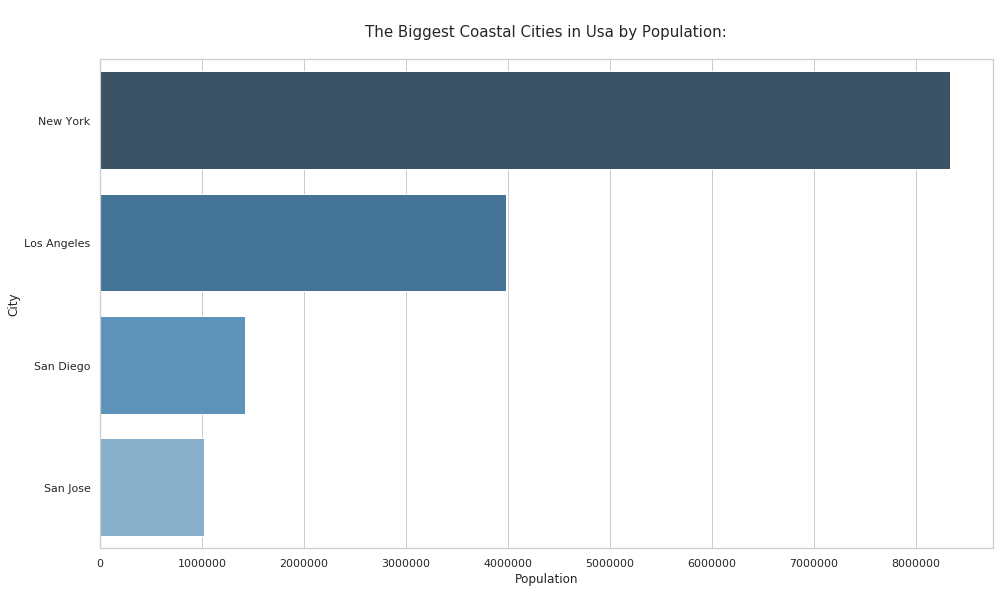

In [22]:
# Set white grid
sns.set(style="whitegrid")

# Cities to series for plotting
y_vals = Biggest_Cities_Usa_df['City']

# Select 'Confirmed' column as y-values
x_vals = Biggest_Cities_Usa_df['Population']

# Set size of figure
plt.figure(figsize=(16,9))

# Create horizontal bar plot
sns.barplot(x=x_vals, y=y_vals, palette=('Blues_d'))

# Title plot
plt.title('\nThe Biggest Coastal Cities in Usa by Population:\n', size=15)

# Save figure
#plt.savefig('PLOT 1 - The Biggest Coastal Cities in Usa by Population', dpi=300)

# Show plot
plt.show()

> <br>We will create a **Points System** to finally choose the coastal city based on the **3 criteria**, the first below:<br><br>

**POINTS assigned on `Population` criteria:**

In [23]:
# Add column
Biggest_Cities_Usa_df['Population - Points'] = [4, 3, 2, 1]
Biggest_Cities_Usa_df

,City,Population,Population - Points
0,New York,8336817,4
1,Los Angeles,3979576,3
2,San Diego,1423851,2
3,San Jose,1021795,1


<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item2'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 1.2 **`Highest-HIGH`** temperatures throughout the year:<br>

**Data Requirements:**<br>
Temperature - Highest-HIGH

**Collection | Understanding | Preparation | Modeling:**

<div class="alert alert-danger" role="alert">
<strong>Source</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    <a href="https://www.noaa.gov/">https://www.noaa.gov/</a><br>
<strong>Method</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    Downloading <strong>.CSV Data</strong> from a National Oceanic and Atmospheric Administration website to extract data!
</div>

<a id='item3'></a>
><br>**`FIRSTLY,` how** do the seasons compare **between the USA and South Africa?**<br>
>When comparing temperatures, the seasons have to be aligned...<br><br>

In [24]:
# Upload .CSV created with data from National Oceanic and Atmospheric Administration website 
# Use data in .CSV to populate a dataframe
Seasons_compared_df = pd.read_csv('./3. Seasons_Compared.csv')

# Read the FIRST 12 rows of the table
Seasons_compared_df.head(12)

,Seasons,Johannesburg - GT - SA,New York - NY - USA,Los Angeles - CA - USA,San Diego - CA - USA,San San Jose - CA - USA
0,1st MTH Spring,September,March,March,March,March
1,2nd MTH Spring,October,April,April,April,April
2,3rd MTH Spring,November,May,May,May,May
3,1st MTH Summer,December,June,June,June,June
4,2nd MTH Summer,January,July,July,July,July
5,3rd MTH Summer,February,August,August,August,August
6,1st MTH Autumn,March,September,September,September,September
7,2nd MTH Autumn,April,October,October,October,October
8,3rd MTH Autumn,May,November,November,November,November
9,1st MTH Winter,June,December,December,December,December


<img src="https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/A-123rf-4377858_m0jrov.jpg" alt="Seasons" align="left" width="20%" height="20%">

> <br>**With this knowledge**, continuing on...<br>
> How do the **`Highest-High monthly temperatures`**, throughout the year, compare with that of **Johannesburg**?<br><br>

In [25]:
# Upload .CSV downloaded from National Oceanic and Atmospheric Administration website
# Use data in .CSV to populate a dataframe
Combined_Highs_df = pd.read_csv('./4. Combined - Highs.csv')

# Read the FIRST 13 rows of the table
Combined_Highs_df.head(12)

,Seasons,Johannesburg - GT - SA,New York - NY - USA,Los Angeles - CA - USA,San Diego - CA - USA,San San Jose - CA - USA
0,1st MTH Spring,24,11,21,19,19
1,2nd MTH Spring,25,18,23,20,21
2,3rd MTH Spring,25,22,24,21,24
3,1st MTH Summer,26,27,26,22,26
4,2nd MTH Summer,26,29,29,24,28
5,3rd MTH Summer,26,29,29,25,28
6,1st MTH Autumn,24,25,29,25,27
7,2nd MTH Autumn,21,18,26,23,24
8,3rd MTH Autumn,20,13,23,21,19
9,1st MTH Winter,17,7,20,19,15


In [26]:
# Make a column the index
Combined_Highs_df.set_index('Seasons')

,Johannesburg - GT - SA,New York - NY - USA,Los Angeles - CA - USA,San Diego - CA - USA,San San Jose - CA - USA
Seasons,,,,,
1st MTH Spring,24,11,21,19,19
2nd MTH Spring,25,18,23,20,21
3rd MTH Spring,25,22,24,21,24
1st MTH Summer,26,27,26,22,26
2nd MTH Summer,26,29,29,24,28
3rd MTH Summer,26,29,29,25,28
1st MTH Autumn,24,25,29,25,27
2nd MTH Autumn,21,18,26,23,24
3rd MTH Autumn,20,13,23,21,19


In [27]:
Combined_Highs_df.index

RangeIndex(start=0, stop=12, step=1)

In [28]:
# Number rows and colums
print("\n", Combined_Highs_df.shape, "= Rows, Columns\n")


 (12, 6) = Rows, Columns



In [29]:
# Read the FIRST 13 rows of the table
Combined_Highs_df.dtypes

Seasons                    object
Johannesburg - GT - SA      int64
New York - NY - USA         int64
Los Angeles - CA - USA      int64
San Diego - CA - USA        int64
San San Jose - CA - USA     int64
dtype: object

<br>

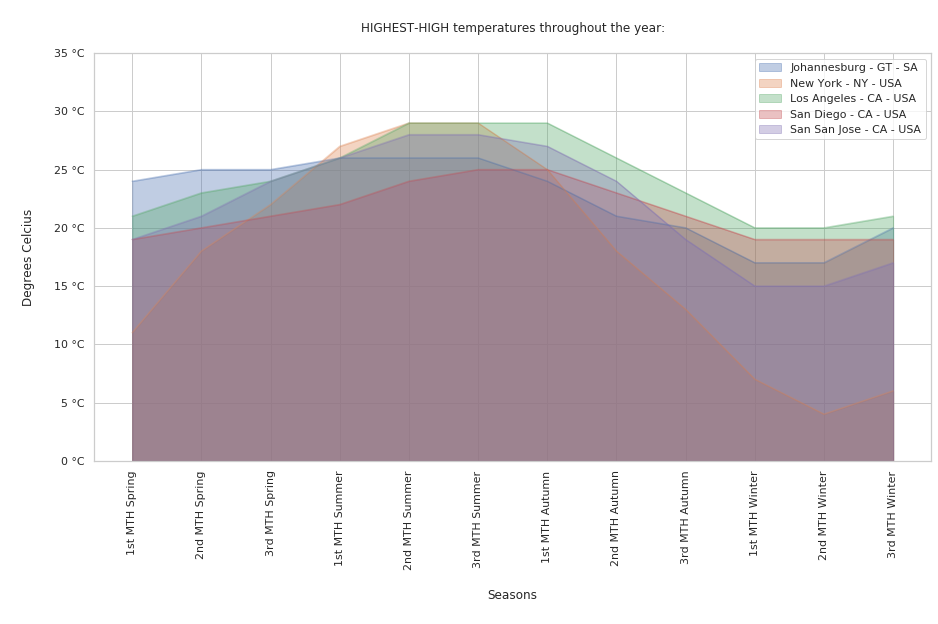

In [30]:
# Create an area plot
Combined_Highs_df.plot(kind='area', 
             stacked=False,
             alpha=0.35,
             figsize=(15, 7.5), # pass a tuple (x, y) size
                      )
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],\
           ['1st MTH Spring', '2nd MTH Spring', '3rd MTH Spring', '1st MTH Summer',\
            '2nd MTH Summer', '3rd MTH Summer', '1st MTH Autumn', '2nd MTH Autumn',\
            '3rd MTH Autumn', '1st MTH Winter', '2nd MTH Winter', '3rd MTH Winter'], rotation=90)  # Set text labels and properties.

plt.yticks([0, 5, 10, 15, 20, 25, 30, 35],\
           ['0 °C', '5 °C', '10 °C', '15 °C', '20 °C', '25 °C', '30 °C', '35 °C'])  # Set text labels and properties.

plt.title('\nHIGHEST-HIGH temperatures throughout the year:\n')
plt.ylabel('\nDegrees Celcius\n')
plt.xlabel('\nSeasons\n')
#plt.savefig('PLOT 2 - HIGHEST-HIGH', dpi=300)
plt.show()

> <br>Above we **`visualize`** these cities with the `highest-high` temperatures throughout the year with an **`Area Plot`** :<br><br>

In [31]:
# Calculate AVERAGE HIGH temperature sorted by highest
avg_highs = Combined_Highs_df
avg_highs.mean(axis = 0).sort_values(ascending=False)

Los Angeles - CA - USA     24.250000
Johannesburg - GT - SA     22.583333
San San Jose - CA - USA    21.916667
San Diego - CA - USA       21.416667
New York - NY - USA        17.416667
dtype: float64

<br>

In [32]:
print("\n")
# DataFrame using arrays. 
  
# initialise data of lists. 
data = {"City":["Los Angeles", "San Jose", "San Diego", "New York "],\
        "Avg. Highs":[24.3, 22.0, 21.4, 17.4], "Avg. Highs - Points":[4, 3, 2, 1]} 
  
# Creates pandas DataFrame. 
highest_highs = pd.DataFrame(data) 
  
# print the data 
print('One of the preferences is a coastal CITY\nwhere the HIGHS throughout any year are\nthe HIGHEST - Average:\n')
highest_highs



One of the preferences is a coastal CITY
where the HIGHS throughout any year are
the HIGHEST - Average:



,City,Avg. Highs,Avg. Highs - Points
0,Los Angeles,24.3,4
1,San Jose,22.0,3
2,San Diego,21.4,2
3,New York,17.4,1


> <br>With the **Points System** we have created, we analyze on the 2nd of the **3 criteria** above, and **visualize** below:<br><br>

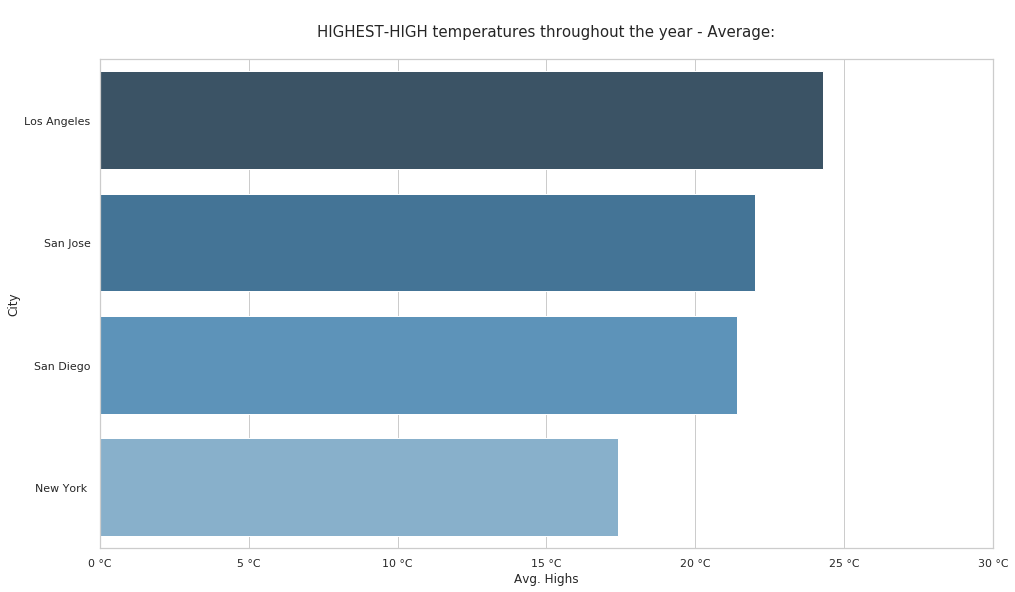

In [33]:
# Set white grid
sns.set(style="whitegrid")

# Cities to series for plotting
y_vals = highest_highs['City']

# Select 'Confirmed' column as y-values
x_vals = highest_highs['Avg. Highs']

# Set size of figure
plt.figure(figsize=(16,9))

# Create horizontal bar plot
sns.barplot(x=x_vals, y=y_vals, palette='Blues_d')

# Title plot
plt.title('\nHIGHEST-HIGH temperatures throughout the year - Average:\n', size=15)

# Save figure
#plt.savefig('PLOT 3 - HIGHEST-HIGH', dpi=300)

plt.xticks([0, 5, 10, 15, 20, 25, 30],\
           ['0 °C', '5 °C', '10 °C', '15 °C', '20 °C', '25 °C', '30 °C'])  # Set text labels and properties.

# Show plot
plt.show()

**POINTS assigned on `HIGHEST-HIGH temperatures throughout the year` criteria:**

In [34]:
# Add column
highest_highs['Avg. Highs - Points'] = [4, 3, 2, 1]
highest_highs

,City,Avg. Highs,Avg. Highs - Points
0,Los Angeles,24.3,4
1,San Jose,22.0,3
2,San Diego,21.4,2
3,New York,17.4,1


<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item4'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 1.3 **`Highest-LOW`** temperatures throughout the year:<br>

**Data Requirements:**<br>
Temperature - Highest-LOW

**Collection | Understanding | Preparation | Modeling:**

<div class="alert alert-danger" role="alert">
<strong>Source</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    <a href="https://www.noaa.gov/">https://www.noaa.gov/</a><br>
<strong>Method</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
     Downloading <strong>.CSV Data</strong> from a National Oceanic and Atmospheric Administration website to extract data!
</div>

<a id='item5'></a>
><br>**`FIRSTLY,` how** do the seasons compare **between the USA and South Africa?**<br>
>When comparing temperatures, the seasons have to be aligned...<br><br>

In [35]:
# Read the FIRST 13 rows of the table
Seasons_compared_df.head(12)

,Seasons,Johannesburg - GT - SA,New York - NY - USA,Los Angeles - CA - USA,San Diego - CA - USA,San San Jose - CA - USA
0,1st MTH Spring,September,March,March,March,March
1,2nd MTH Spring,October,April,April,April,April
2,3rd MTH Spring,November,May,May,May,May
3,1st MTH Summer,December,June,June,June,June
4,2nd MTH Summer,January,July,July,July,July
5,3rd MTH Summer,February,August,August,August,August
6,1st MTH Autumn,March,September,September,September,September
7,2nd MTH Autumn,April,October,October,October,October
8,3rd MTH Autumn,May,November,November,November,November
9,1st MTH Winter,June,December,December,December,December


<img src="https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/A-123rf-4377858_m0jrov.jpg" alt="Seasons" align="left" width="20%" height="20%">

> <br>**With this knowledge**, continuing on...<br>
> How do the **`Highest-Low monthly temperatures`**, throughout the year, compare with that of **Johannesburg**?<br><br>

In [36]:
# Upload .CSV downloaded from National Oceanic and Atmospheric Administration website
# Use data in .CSV to populate a dataframe
Combined_Lows_df = pd.read_csv('./5. Combined - Lows.csv')

# Read the FIRST 13 rows of the table
Combined_Lows_df.head(12)

,Seasons,Johannesburg - GT - SA,New York - NY - USA,Los Angeles - CA - USA,San Diego - CA - USA,San San Jose - CA - USA
0,1st MTH Spring,8,2,11,12,8
1,2nd MTH Spring,11,7,13,14,9
2,3rd MTH Spring,12,12,15,15,11
3,1st MTH Summer,14,18,17,17,13
4,2nd MTH Summer,15,20,18,19,15
5,3rd MTH Summer,14,20,19,20,15
6,1st MTH Autumn,13,16,18,19,14
7,2nd MTH Autumn,9,10,16,16,12
8,3rd MTH Autumn,6,6,12,12,8
9,1st MTH Winter,3,0,9,10,6


In [37]:
# Make a column the index
Combined_Lows_df.set_index('Seasons')

,Johannesburg - GT - SA,New York - NY - USA,Los Angeles - CA - USA,San Diego - CA - USA,San San Jose - CA - USA
Seasons,,,,,
1st MTH Spring,8,2,11,12,8
2nd MTH Spring,11,7,13,14,9
3rd MTH Spring,12,12,15,15,11
1st MTH Summer,14,18,17,17,13
2nd MTH Summer,15,20,18,19,15
3rd MTH Summer,14,20,19,20,15
1st MTH Autumn,13,16,18,19,14
2nd MTH Autumn,9,10,16,16,12
3rd MTH Autumn,6,6,12,12,8


In [38]:
Combined_Lows_df.index

RangeIndex(start=0, stop=12, step=1)

In [39]:
# Number rows and colums
print("\n", Combined_Lows_df.shape, "= Rows, Columns\n")


 (12, 6) = Rows, Columns



In [40]:
# Read the FIRST 13 rows of the table
Combined_Lows_df.dtypes

Seasons                    object
Johannesburg - GT - SA      int64
New York - NY - USA         int64
Los Angeles - CA - USA      int64
San Diego - CA - USA        int64
San San Jose - CA - USA     int64
dtype: object

<br>

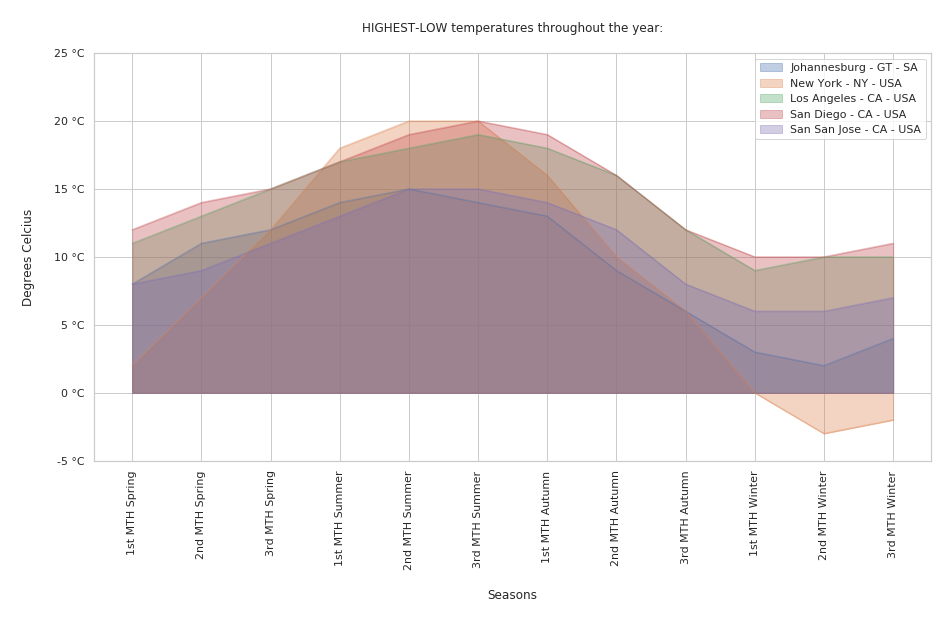

In [41]:
# Create an area plot
Combined_Lows_df.plot(kind='area', 
             stacked=False,
             alpha=0.35,
             figsize=(15, 7.5), # pass a tuple (x, y) size
                      )
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],\
           ['1st MTH Spring', '2nd MTH Spring', '3rd MTH Spring', '1st MTH Summer',\
            '2nd MTH Summer', '3rd MTH Summer', '1st MTH Autumn', '2nd MTH Autumn',\
            '3rd MTH Autumn', '1st MTH Winter', '2nd MTH Winter', '3rd MTH Winter'], rotation=90)  # Set text labels and properties.

plt.yticks([-5, 0, 5, 10, 15, 20, 25],\
           ['-5 °C', '0 °C', '5 °C', '10 °C', '15 °C', '20 °C', '25 °C'])  # Set text labels and properties.

plt.title('\nHIGHEST-LOW temperatures throughout the year:\n')
plt.ylabel('\nDegrees Celcius\n')
plt.xlabel('\nSeasons\n')
#plt.savefig('PLOT 4 - HIGHEST-LOW', dpi=300)
plt.show()

> <br>Above we **`visualize`** cities with the `highest-low` temperatures throughout the year with an **`Area Plot`** :<br><br>

In [42]:
# Calculate AVERAGE HIGH-Lows temperature sorted by highest
avg_high_lows = Combined_Lows_df
avg_high_lows.mean(axis = 0).sort_values(ascending=False)

San Diego - CA - USA       14.583333
Los Angeles - CA - USA     14.000000
San San Jose - CA - USA    10.333333
Johannesburg - GT - SA      9.250000
New York - NY - USA         8.833333
dtype: float64

<br>

In [43]:
print("\n")
# DataFrame using arrays. 
  
# initialise data of lists. 
data = {"City":["San Diego", "Los Angeles", "San Jose", "New York"],\
        "Avg. High-Lows":[14.6, 14.0, 10.3, 8.8], "Avg. Highs-Lows - Points":[4, 3, 2, 1]} 
  
# Creates pandas DataFrame. 
highest_lows = pd.DataFrame(data) 
  
# print the data 
print("One of the preferences is a coastal CITY where the\nHIGHEST-LOWS throughout any year are the HIGHEST\n- Average:\n")
highest_lows



One of the preferences is a coastal CITY where the
HIGHEST-LOWS throughout any year are the HIGHEST
- Average:



,City,Avg. High-Lows,Avg. Highs-Lows - Points
0,San Diego,14.6,4
1,Los Angeles,14.0,3
2,San Jose,10.3,2
3,New York,8.8,1


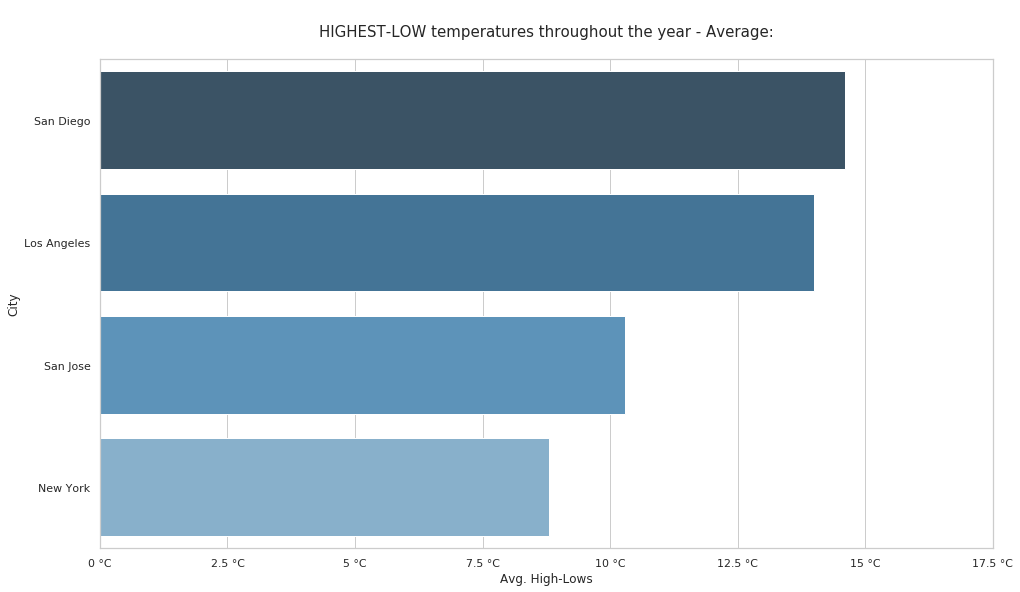

In [44]:
# Set white grid
sns.set(style="whitegrid")

# Cities to series for plotting
y_vals = highest_lows['City']

# Select 'Confirmed' column as y-values
x_vals = highest_lows['Avg. High-Lows']

# Set size of figure
plt.figure(figsize=(16,9))

# Create horizontal bar plot
sns.barplot(x=x_vals, y=y_vals, palette='Blues_d')

# Title plot
plt.title('\nHIGHEST-LOW temperatures throughout the year - Average:\n', size=15)

# Save figure
#plt.savefig('PLOT 5 - HIGHEST-LOW', dpi=300)

plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5],\
           ['0 °C', '2.5 °C', '5 °C', '7.5 °C', '10 °C', '12.5 °C', '15 °C', '17.5 °C'])  # Set text labels and properties.

# Show plot
plt.show()

**POINTS assigned on `HIGHEST-Low temperatures throughout the year` criteria:**

In [45]:
# Add column
highest_lows['Avg. Highs-Lows - Points'] = [4, 3, 2, 1]
highest_lows

,City,Avg. High-Lows,Avg. Highs-Lows - Points
0,San Diego,14.6,4
1,Los Angeles,14.0,3
2,San Jose,10.3,2
3,New York,8.8,1


<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item6'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 1.4 **`RESULT`** - City `statistically` derived:<br>

<a id='item5'></a>
><br>Join all our results together to get the **`TOTAL`:**<br><br>

In [46]:
print("\n")
# DataFrame using arrays. 
  
# initialise data of lists. 
data = {"City":["Los Angeles", "New York", "San Diego", "San Jose"],\
        "Population - Points":[3, 4, 2, 1], "Avg. Highs - Points":[4, 1, 2, 3], "Avg. Highs-Lows - Points":[3, 1, 4, 2]} 
  
# Creates pandas DataFrame. 
Cities_points = pd.DataFrame(data) 
  
# print the data 
Cities_points.head()

,City,Population - Points,Avg. Highs - Points,Avg. Highs-Lows - Points
0,Los Angeles,3,4,3
1,New York,4,1,1
2,San Diego,2,2,4
3,San Jose,1,3,2


<br>

In [47]:
# Add the points together
Cities_points['TOTAL - POINTS'] = Cities_points['Population - Points'] + Cities_points['Avg. Highs - Points'] + Cities_points['Avg. Highs-Lows - Points']
Cities_points.head()

,City,Population - Points,Avg. Highs - Points,Avg. Highs-Lows - Points,TOTAL - POINTS
0,Los Angeles,3,4,3,10
1,New York,4,1,1,6
2,San Diego,2,2,4,8
3,San Jose,1,3,2,6


<br>

In [48]:
# Get Column names
Cities_points.columns

Index(['City', 'Population - Points', 'Avg. Highs - Points',
       'Avg. Highs-Lows - Points', 'TOTAL - POINTS'],
      dtype='object')

In [49]:
# sort descending dataframe with pandas
Cities_point_ver1 = Cities_points.sort_values('TOTAL - POINTS', ascending=False)
Cities_point_ver1.head()

,City,Population - Points,Avg. Highs - Points,Avg. Highs-Lows - Points,TOTAL - POINTS
0,Los Angeles,3,4,3,10
2,San Diego,2,2,4,8
1,New York,4,1,1,6
3,San Jose,1,3,2,6


<br>

In [50]:
# Delete multiple columns from the dataframe
Cities_point_ver2 = Cities_point_ver1.drop(["Population - Points", "Avg. Highs - Points", "Avg. Highs-Lows - Points"], axis=1)

<br>**POINTS on `ALL` criteria:**<br>

In [51]:
# View df
Cities_point_ver2.head()

,City,TOTAL - POINTS
0,Los Angeles,10
2,San Diego,8
1,New York,6
3,San Jose,6


<br>

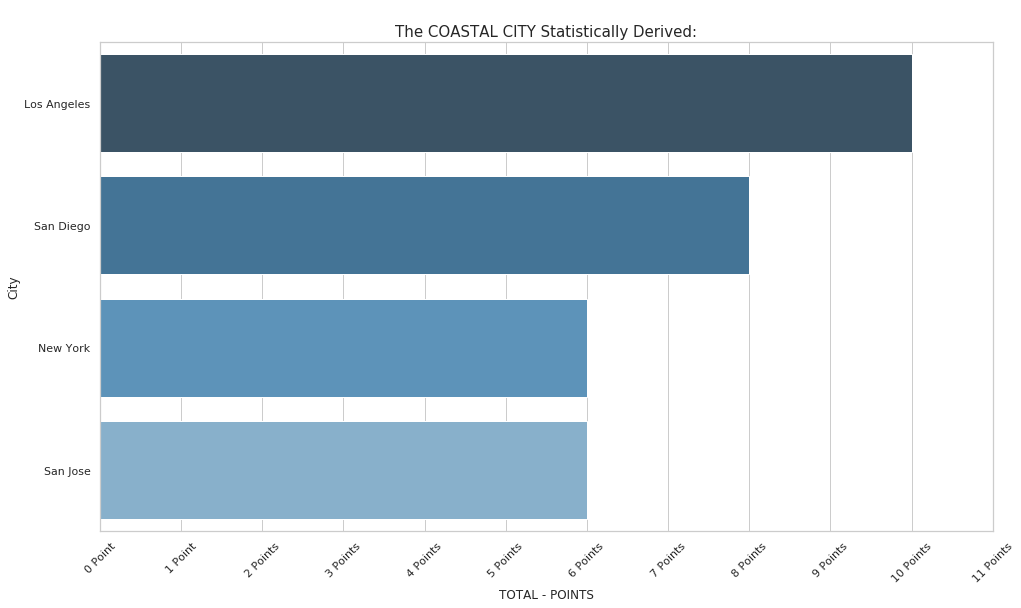

In [52]:
# Set white grid
sns.set(style="whitegrid")

# Cities to series for plotting
y_vals = Cities_point_ver2["City"]

# Select 'Confirmed' column as y-values
x_vals = Cities_point_ver2["TOTAL - POINTS"]

# Set size of figure
plt.figure(figsize=(16,9))

# Create horizontal bar plot
sns.barplot(x=x_vals, y=y_vals, palette='Blues_d')

# Title plot
plt.title('\nThe COASTAL CITY Statistically Derived:', size=15)

# Save figure
# plt.savefig('PLOT 6 - Statistically Derived City', dpi=300)

# Set text labels and properties.
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],\
           ['0 Point', '1 Point', '2 Points', '3 Points', '4 Points', '5 Points', '6 Points',\
            '7 Points', '8 Points', '9 Points', '10 Points', '11 Points'], rotation=45)

# Show plot
plt.show()

> <br>Above we **`visualize`** the cities with the `most points` with a **`Bar Plot`** :<br><br>

In [53]:
# Make a data frame with dots to show on the map
usa_map_data = pd.DataFrame({
'lon':[-118.2427666],
'lat':[34.0536909],
'name':['Los Angeles']
})
usa_map_data

# Make an empty map
map_usa_la = folium.Map(location=[39.0473, -95.6752], tiles="OpenStreetMap", zoom_start=4)
    
# I can add marker one by one on the map
for i in range(0,len(usa_map_data)):
    folium.Marker([usa_map_data.iloc[i]['lat'], usa_map_data.iloc[i]['lon']], popup=usa_map_data.iloc[i]['name']).add_to(map_usa_la)  
    
# Save it as html
#map_usa_la.save('MAP 1.html')

# Display the map
print('\nLocation of Los Angeles in the United States of America:\n')
map_usa_la


Location of Los Angeles in the United States of America:



Maps are **not displaying** on GitHub, I have inserted an image of the map the code generates below:

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Big%20Fish%20-%20Map%201.jpg?raw=true" alt="Map 1" align="left" width="100%" height="100%">

In [54]:
# Make a data frame with dots to show on the map
usa_map_data = pd.DataFrame({
'lon':[-118.2427666],
'lat':[34.0536909],
'name':['Los Angeles']
})
usa_map_data

# Make an empty map
map_usa_la_z = folium.Map(location=[34.0536909, -118.2427666], tiles="OpenStreetMap", zoom_start=9)
    
# I can add marker one by one on the map
for i in range(0,len(usa_map_data)):
    folium.Marker([usa_map_data.iloc[i]['lat'], usa_map_data.iloc[i]['lon']], popup=usa_map_data.iloc[i]['name']).add_to(map_usa_la_z)  

# Save it as html
#map_usa_la_z.save('MAP 2.html')

# Display the map
print('\nZoomed in map of Los Angeles:\n')
map_usa_la_z


Zoomed in map of Los Angeles:



Maps are **not displaying** on GitHub, I have inserted an image of the map the code generates below:

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Big%20Fish%20-%20Map%202.jpg?raw=true" alt="Map 2" width="100%" height="100%" align="left">

---

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><strong>THE COASTAL CITY</strong> ( statistically serived ): </h3><strong><h1>Los Angeles</h1></strong>
</div>

<img src="https://i.pinimg.com/originals/94/c7/99/94c799511003ff57b0b6d552fde0e254.jpg" alt="LA" align="left" width="20%" height="40%">

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item7'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong><h1>Part 2 - Choosing the NEIGHBORHOOD in the coastal city derived:</h1></strong>
</div>

<br>

# 2.1 **`Download`** and **`Explore`** . Json dataset to get neighborhood information:<br>

><br>**"JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language Standard ECMA-262 3rd Edition - December 1999. JSON is a text format that is completely language independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others. These properties make JSON an ideal data-interchange language.""**<br>Source: https://www.json.org/json-en.html<br><br>

**Data Requirements:**<br>
Los Angeles neighborhoods with Latitudes and Longitudes and other information

<div class="alert alert-danger" role="alert">
<strong>Source</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    <a href="https://usc.data.socrata.com/api/views/9utn-waje/rows.json">https://usc.data.socrata.com/</a><br>
<strong>Method</strong>: 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
    Downloading <strong>.Json Data</strong> from The Neighborhood Data for Social Change (NDSC) platform!
</div>

In [55]:
# Download the .json file
!wget -q -O 'LA_Data.json' https://usc.data.socrata.com/api/views/9utn-waje/rows.json
print('\n!! Los Angeles .Json data downloaded !!\n')


!! Los Angeles .Json data downloaded !!



In [56]:
# Open the file and save the contents in a dataframe
with open('LA_Data.json') as json_data:
    los_angeles_data = json.load(json_data)
type(los_angeles_data)

dict

In [57]:
# Find the section with the neighborhood information
print ("\nThese are the Los Angeles Data keys and their value lengths from the Json file:\n")
print ("------------------------------------------------------------------------------\n") 
for key, value in los_angeles_data.items(): 
    print (key, len(str(value)), '\n\n')


These are the Los Angeles Data keys and their value lengths from the Json file:

------------------------------------------------------------------------------

meta 15953 


data 1123199 




In [58]:
# Create a new dataframe with the section with the neighborhood information
neighborhoods_data = los_angeles_data['data']

> <br>We are **`retrieving`** the neighborhood `information` from the **`.Json`** file:<br><br>

Look at the first section of information on a neighborhood

In [59]:
# Look at first section of information on a neighborhood
neighborhoods_data[0]

['row-nhgs-3gdi~sq5y',
 '00000000-0000-0000-47CF-3583B50548BD',
 0,
 1503434412,
 None,
 1503434412,
 None,
 '{ }',
 'L.A. County Neighborhoods (Current)',
 'acton',
 'MULTIPOLYGON (((-118.20261747920541 34.53898972076929, -118.18946958918568 34.5385546636616, -118.18950400422953 34.5349457732411, -118.185124836341 34.53482956044709, -118.18516440876348 34.53124651970553, -118.17601577983017 34.531354702430015, -118.1761893084381 34.523803185624594, -118.16702561365965 34.52351227823281, -118.16294026595281 34.523716853632315, -118.16298888279476 34.52758691891819, -118.15426797766412 34.527789861082844, -118.154027259229 34.527320039393956, -118.15365520720269 34.527429379780635, -118.15063530637565 34.52459083233748, -118.15064418231482 34.524313334147, -118.1503344972929 34.52430740894222, -118.1485050801056 34.52258602710374, -118.14850638270086 34.52199529568578, -118.1478640542421 34.521983357228365, -118.14301598797277 34.51742182339587, -118.14300391540229 34.51688741100935, -1

> <br>Creating a **`dataframe`** and then populate it with `information` from the **`.Json`** file:<br><br>

In [60]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [61]:
# View empty dataframe
neighborhoods

,Neighborhood,Latitude,Longitude


In [62]:
# Populate the dataframe with information from the .Json file
for data in neighborhoods_data:
    neighborhood_name = data[0:272][13]
    neighborhood_lat = data[0:272][20]
    neighborhood_lon = data[0:272][19]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [63]:
# View the 1st 11 rows of the dataframe
neighborhoods.head(11)

,Neighborhood,Latitude,Longitude
0,Acton,34.497355239240846,-118.16981019229348
1,Adams-Normandie,34.031461499124156,-118.30020800000011
2,Agoura Hills,34.146736499122795,-118.75988450000015
3,Agua Dulce,34.504926999796837,-118.3171036690717
4,Alhambra,34.085538999123571,-118.13651200000021
5,Alondra Park,33.889617004889644,-118.33515598608159
6,Artesia,33.866895999126271,-118.08010100000017
7,Altadena,34.193870502232173,-118.13623898201556
8,Angeles Crest,34.313937005895312,-117.9223952817848
9,Arcadia,34.133229999123017,-118.03041899311202


In [64]:
print("\n !! The dataframe has {} unique neighborhoods !!\n".format(
        len(neighborhoods['Neighborhood'].unique()),
        neighborhoods.shape[0]
    )
)


 !! The dataframe has 272 unique neighborhoods !!



In [65]:
LA_data = neighborhoods
LA_data.head(10)

,Neighborhood,Latitude,Longitude
0,Acton,34.497355239240846,-118.16981019229348
1,Adams-Normandie,34.031461499124156,-118.30020800000011
2,Agoura Hills,34.146736499122795,-118.75988450000015
3,Agua Dulce,34.504926999796837,-118.3171036690717
4,Alhambra,34.085538999123571,-118.13651200000021
5,Alondra Park,33.889617004889644,-118.33515598608159
6,Artesia,33.866895999126271,-118.08010100000017
7,Altadena,34.193870502232173,-118.13623898201556
8,Angeles Crest,34.313937005895312,-117.9223952817848
9,Arcadia,34.133229999123017,-118.03041899311202


> <br>We use **`geolocator`** to find the `geographical coordinates` of **LOS ANGELES**:<br><br>

In [66]:
# use geolocator to find the geographical coordinates of LOS ANGELES
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="LAC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('\nThe geograpical coordinates of LOS ANGELES are:\n\nLatitude:   {},\nLongitude: {}.'.format(latitude, longitude), '\n')


The geograpical coordinates of LOS ANGELES are:

Latitude:   34.0536909,
Longitude: -118.2427666. 



In [67]:
# Data types of dataframe
LA_data.dtypes

Neighborhood    object
Latitude        object
Longitude       object
dtype: object

In [68]:
# Correct the data by casting or converting an 'Object' to a 'float'
LA_data["Latitude"] = LA_data['Latitude'].astype('float64')
LA_data.dtypes

Neighborhood     object
Latitude        float64
Longitude        object
dtype: object

In [69]:
# Correct the data by casting or converting an 'Object' to a 'float'
LA_data["Longitude"] = LA_data['Longitude'].astype('float64')
LA_data.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [70]:
# Confirm the data types of dataframe have been changed
LA_data.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [71]:
# create map of Los Angeles using latitude and longitude values
los_angeles_map = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(LA_data['Latitude'], LA_data['Longitude'], LA_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.35,
        parse_html=False).add_to(los_angeles_map)

# Save it as html
#map_usa_la_z.save('MAP 3.html')

# Display the map
print('\nMap of Los Angeles Neighborhoods:\n')
los_angeles_map


Map of Los Angeles Neighborhoods:



Maps are **not displaying** on GitHub, I have inserted an image of the map the code generates below:

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Big%20Fish%20-%20Map%203.jpg?raw=true" alt="Map 3" align="left" width="100%" height="100%">

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item8'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 2.2 **`FourSquare API`** use:<br>

<img src="https://wpuploads.appadvice.com/wp-content/uploads/2014/07/tumblr_inline_n965bkOymr1qzxhga.png" alt="FS" align="left" width="10%" height="10%">

> <br>Using Foursquare to get information for each neighborhood, collected in the above section.<br><br>**The app's purpose is to help you discover and share information about `businesses and attractions` around you.**<br>Source: https://smallbusiness.chron.com/foursquare-work-28728.html<br><br>

**Collection | Understanding | Preparation:**

In [72]:
# The code was removed by Watson Studio for sharing.


 !! Your SECRET Foursquare API credentials have been SAVED !!



In [73]:
# Fetch Foursquare Venue Category Hierarchy
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [74]:
# Structure or the keys of the returned request
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [75]:
# Get the main categories
category_list = category_results['response']['categories']

In [76]:
# How many main categories
len(category_list)

10

<br>**Get the `MAIN categories` from Foursquare:**<br><br>

In [77]:
# What are the main categories'names
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


In [78]:
# Food & It's Sub-Categories

# Create a function to return a dictionary with Ids' & Names of Food & It's Sub-Categories.
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [79]:
# This function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259') # Food Category

<br>**Get the `SUB-categories` of category: `Food`:**<br><br>

In [80]:
# All the sub-categories of category: Food
category_dict

{'4d4b7105d754a06374d81259': 'Food',
 '503288ae91d4c4b30a586d67': 'Afghan Restaurant',
 '4bf58dd8d48988d1c8941735': 'African Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d14e941735': 'American Restaurant',
 '4bf58dd8d48988d157941735': 'New American Restaurant',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '56aa371be4b08b9a8d573568': 'Burmese Restaurant',
 '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Restaurant',
 '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant',
 '52af3a723cf9994f4e043bec': 'Beijing Restaurant',
 '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant',
 '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng',
 '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant',
 '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place',
 '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant',
 '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant',
 '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant',
 '52af3ab53cf9994f4e043bf1'

> <br>ID: **'4d4b7105d754a06374d81259'** for the **'Food Category'**<br><br>  

In [81]:
# Find the 1st neighborhood
LA_data.loc[0, 'Neighborhood']

'Acton'

In [82]:
# neighborhood latitude value
neighborhood_latitude = LA_data.loc[0, 'Latitude']
neighborhood_longitude = LA_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = LA_data.loc[0, 'Neighborhood'] # neighborhood name

print('\n {} in Los Angeles has a latitude of {} and longitude of {} '.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude), '\n')


 Acton in Los Angeles has a latitude of 34.49735523924085 and longitude of -118.16981019229348  



Get the **Food Venues** that are in Acton, Los Angeles within a radius of **1km**

In [83]:
# The code was removed by Watson Studio for sharing.


!! Your SECRET URL has been SAVED !!



In [84]:
# Send the GET request and examine the results
results = requests.get(url).json()

> <br>**Get the `information` in the `'Food'` category:**<br><br>

In [85]:
# The results
results

{'meta': {'code': 200, 'requestId': '5f10466a40bfaa3334c830b2'},
 'response': {'venues': [{'id': '4c8540afdc018cfa70dfe66c',
    'name': "Crazy Otto's Diner",
    'location': {'address': '33317 Santiago Rd',
     'crossStreet': 'at Sierra Hwy',
     'lat': 34.49073301833667,
     'lng': -118.162548356138,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.49073301833667,
       'lng': -118.162548356138},
      {'label': 'entrance', 'lat': 34.49079, 'lng': -118.16178}],
     'distance': 993,
     'postalCode': '93510',
     'cc': 'US',
     'city': 'Acton',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['33317 Santiago Rd (at Sierra Hwy)',
      'Acton, CA 93510',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d143941735',
      'name': 'Breakfast Spot',
      'pluralName': 'Breakfast Spots',
      'shortName': 'Breakfast',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
       'suffix': '.p

In [86]:
# The categoryId parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from category_dict.
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

> <br>Get the **FOOD VENUES** in Los Angeles, within a radius of **1km**:<br><br>

In [87]:
# Create a function to repeat the same process to all the neighborhoods in Los Angeles
def getNearbySeaFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('*** Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            '4d4b7105d754a06374d81259', # Food
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print(" Done ***\n\n {} venues with incomplete information!\n".format(not_found))
    return(nearby_venues)

In [88]:
# Code to run the above function on each neighborhood and create a new dataframe called LA_venues
LA_venues = getNearbySeaFood(names=LA_data['Neighborhood'],
                            latitudes=LA_data['Latitude'],
                            longitudes=LA_data['Longitude']
                           )

*** Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Done ***

 0 venues with incomplete information!



> <br>The returned **FOOD VENUES**, for all neighborhoods in LA, saved in a **dataframe**:<br><br>

In [89]:
# View dataframe
print(LA_venues.shape)
LA_venues.head(10)

(8328, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,34.497355,-118.169810,Crazy Otto's Diner,34.490733,-118.162548,Breakfast Spot
1,Acton,34.497355,-118.169810,First Class Cakes,34.489885,-118.160798,Cupcake Shop
2,Acton,34.497355,-118.169810,Perkin' Up Coffee House,34.490303,-118.160742,Café
3,Acton,34.497355,-118.169810,Pizza Factory,34.490011,-118.161091,Pizza Place
4,Acton,34.497355,-118.169810,Grizzly Bears Burgers,34.490076,-118.162006,Burger Joint
5,Acton,34.497355,-118.169810,The Rustic Cafe & Bakery,34.490163,-118.160684,Café
6,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
7,Adams-Normandie,34.031461,-118.300208,Rincón Hondureño,34.032578,-118.298859,Cuban Restaurant
8,Adams-Normandie,34.031461,-118.300208,Starbucks,34.025776,-118.308577,Coffee Shop
9,Adams-Normandie,34.031461,-118.300208,El Pollo Loco,34.035448,-118.291512,Fast Food Restaurant


In [90]:
# Working directory
!pwd

/resources/Capstone Project - The Battle of Neighborhoods - Week 4


In [91]:
# Save as .csv for later use
LA_venues.to_csv('./0. LA_venues_before_changes.csv')

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item9'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 2.3 **`Exploring`** Neighborhoods:<br>

> <br>**How many venues were returned for each neighborhood?**<br><br>

In [92]:
# Check how many venues were returned for each neighborhood
LA_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,6,6,6,6,6,6
Adams-Normandie,37,37,37,37,37,37
Agoura Hills,46,46,46,46,46,46
Alhambra,50,50,50,50,50,50
Alondra Park,40,40,40,40,40,40
Altadena,18,18,18,18,18,18
Arcadia,46,46,46,46,46,46
Arleta,36,36,36,36,36,36
Arlington Heights,46,46,46,46,46,46


> <br>**How many unique categories can be found from all the returned `FOOD` venues?**<br><br>

In [93]:
# Let's find out how many unique categories can be found from all the returned venues
print('\nThere are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))
LA_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)


There are 184 uniques categories.


Venue Category
Mexican Restaurant                          751
Fast Food Restaurant                        510
Coffee Shop                                 501
Pizza Place                                 402
Bakery                                      316
Chinese Restaurant                          308
Food                                        304
Food Truck                                  294
American Restaurant                         257
Burger Joint                                252
Café                                        229
Sandwich Place                              227
Restaurant                                  174
Taco Place                                  172
Donut Shop                                  169
Seafood Restaurant                          150
Sushi Restaurant                            147
Ice Cream Shop                              145
Italian Restaurant                          131
Fried Chicken Joint                         126
Japanese Restaurant      

> <br>**We only want:**<br>
> 1. Seafood Restaurants
> 2. Sushi Restaurants
> 3. Japanese Restaurants
> 4. Fish & Chips Shops<br><br>

In [94]:
# list all the categories
unique_categories = LA_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Breakfast Spot, Cupcake Shop, Café, Pizza Place, Burger Joint, Sushi Restaurant, Cuban Restaurant, Coffee Shop, Fast Food Restaurant, Mexican Restaurant, Food, Himalayan Restaurant, Juice Bar, Restaurant, Bakery, Donburi Restaurant, Chinese Restaurant, Wings Joint, Indian Restaurant, Fried Chicken Joint, Ice Cream Shop, Taco Place, South American Restaurant, Hawaiian Restaurant, Italian Restaurant, Snack Place, Steakhouse, American Restaurant, Cocktail Bar, Japanese Restaurant, Thai Restaurant, Deli / Bodega, Brewery, Sports Bar, BBQ Joint, Convenience Store, Szechuan Restaurant, Bubble Tea Shop, Hunan Restaurant, Asian Restaurant, Dumpling Restaurant, Dessert Shop, Burmese Restaurant, Korean Restaurant, Vietnamese Restaurant, Noodle House, Sandwich Place, Poke Place, Dim Sum Restaurant, Cajun / Creole Restaurant, Tea Room, Food Truck, Mediterranean Restaurant, Bagel Shop, Donut Shop, South Indian Restaurant, Filipino Restaurant, Frozen Yogurt Shop, Grocery Store, Food & Drink Shop, Di

In [95]:
# manually create a list of generalized categories which we will remove
general_categories = ['Churrascaria', 'Breakfast Spot', 'Café', 'Cupcake Shop', 'Pizza Place', 'Burger Joint', 'Cuban Restaurant', 'Coffee Shop', 
                      'Mexican Restaurant', 'Fast Food Restaurant', 'Food', 'Himalayan Restaurant', 'Juice Bar', 'Restaurant', 'Donburi Restaurant', 
                      'Chinese Restaurant', 'Wings Joint', 'Bakery', 'Indian Restaurant', 'Fried Chicken Joint', 'Taco Place', 'Ice Cream Shop', 
                      'South American Restaurant', 'Hawaiian Restaurant', 'Italian Restaurant', 'Snack Place', 'Steakhouse', 'American Restaurant', 
                      'Cocktail Bar', 'Thai Restaurant', 'Brewery', 'Sports Bar', 'Deli / Bodega', 'BBQ Joint', 'Dessert Shop', 
                      'Convenience Store', 'Bubble Tea Shop', 'Szechuan Restaurant', 'Hunan Restaurant', 'Asian Restaurant', 'Dumpling Restaurant', 
                      'Burmese Restaurant', 'Noodle House', 'Vietnamese Restaurant', 'Korean Restaurant', 'Sandwich Place', 'Poke Place', 'Dim Sum Restaurant', 
                      'Cajun / Creole Restaurant', 'Tea Room', 'Food Truck', 'Mediterranean Restaurant', 'Donut Shop', 'Bagel Shop', 'South Indian Restaurant', 
                      'Filipino Restaurant', 'Frozen Yogurt Shop', 'Grocery Store', 'Food & Drink Shop', 'Diner', 'Design Studio', 'Golf Course', 'Shabu-Shabu Restaurant', 
                      'Taiwanese Restaurant', 'Shanghai Restaurant', 'Arts & Crafts Store', 'Ramen Restaurant', 'Spanish Restaurant', 'Burrito Place', 
                      'Latin American Restaurant', 'Hot Dog Joint', 'Paella Restaurant', 'Caribbean Restaurant', 'Vegetarian / Vegan Restaurant', 'Gas Station', 
                      'Southern / Soul Food Restaurant', 'Food Court', 'Middle Eastern Restaurant', 'Persian Restaurant', 'Buffet', 'Kebab Restaurant', 
                      'Gastropub', 'Bar', 'Hotel', 'New American Restaurant', 'Brazilian Restaurant', 'Liquor Store', 'Salvadoran Restaurant', 'Cantonese Restaurant', 'Supermarket', 
                      'Miscellaneous Shop', 'Argentinian Restaurant', 'Wine Bar', 'Gourmet Shop', 'Gay Bar', 'French Restaurant',' Churrascaria', 'Peruvian Restaurant', 'Doner Restaurant', 
                      'Comfort Food Restaurant', 'Empanada Restaurant', 'Salad Place', 'Shopping Mall', 'North Indian Restaurant', 'Gluten-free Restaurant', 'Arepa Restaurant', 
                      'Other Nightlife', 'Kosher Restaurant', 'Tapas Restaurant', 'Office', 'Greek Restaurant', 'Smoothie Shop', 'Cafeteria', 'Ethiopian Restaurant', 
                      'Financial or Legal Service', 'Music Venue', 'Creperie', 'Building', 'Roof Deck', 'Hotpot Restaurant', 'Travel Lounge', 'Gym / Fitness Center', 'African Restaurant', 
                      'Health Food Store', 'Halal Restaurant', 'Tex-Mex Restaurant', 'Food Stand', 'Arcade', 'College Cafeteria', 'Bistro', 'Farmers Market', 'Scandinavian Restaurant', 
                      'Lebanese Restaurant', 'Movie Theater', 'Residential Building (Apartment / Condo)', 'Market', 'Irish Pub', 'Falafel Restaurant', 'Bookstore', 'Hookah Bar', 
                      'German Restaurant', 'Salon / Barbershop', 'High School', 'Pastry Shop', 'Mac & Cheese Joint', 'Sporting Goods Shop', 'Dongbei Restaurant', 'Theme Restaurant', 
                      'Lounge', 'Chocolate Shop', 'Candy Store', 'Pub', 'Non-Profit', 'Beer Garden', 'Karaoke Bar', 'Event Service', 'Butcher', 'Corporate Cafeteria', 'General Entertainment', 
                      'Sake Bar', 'Automotive Shop', 'Mongolian Restaurant', 'Indonesian Restaurant', 'Herbs & Spices Store', 'Modern European Restaurant', 'Soup Place', 'Dive Bar', 
                      'Speakeasy', 'Organic Grocery', 'Australian Restaurant', 'Udon Restaurant', 'Event Space', 'Moroccan Restaurant', 'Pharmacy', 'Eastern European Restaurant', 
                      'Hotel Bar', 'Wine Shop', 'Hospital', 'Factory', 'Pie Shop', 'Baseball Field', 'Russian Restaurant']

In [96]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Fish & Chips Shop, Seafood Restaurant, Sushi Restaurant, Japanese Restaurant


In [97]:
# Remove all the generalized categories, like 'Churrascaria', 'Breakfast Spot', 'Café', 'Cupcake Shop', 'Pizza Place', 'Burger Joint'
LA_venues = LA_venues[LA_venues['Venue Category'].isin(food_categories)].reset_index()
LA_venues.head(10)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,6,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
1,62,Agoura Hills,34.146736,-118.759885,Beji Sushi,34.144398,-118.755020,Sushi Restaurant
2,74,Agoura Hills,34.146736,-118.759885,Yamato Japanese Restaurant,34.143856,-118.751357,Japanese Restaurant
3,123,Alhambra,34.085539,-118.136512,Sheng Sushi,34.092368,-118.133315,Sushi Restaurant
4,161,Alondra Park,33.889617,-118.335156,Wasabi Sushiya,33.884904,-118.326141,Sushi Restaurant
5,228,Artesia,33.866896,-118.080101,Magic Touch Bullet Train Sushi,33.858064,-118.080325,Sushi Restaurant
6,245,Altadena,34.193871,-118.136239,Junzo's,34.196484,-118.133316,Sushi Restaurant
7,288,Arcadia,34.133230,-118.030419,Maki & Sushi Arcadia,34.139862,-118.023871,Sushi Restaurant
8,290,Arcadia,34.133230,-118.030419,Tokyo Wako,34.140521,-118.021900,Japanese Restaurant
9,292,Arcadia,34.133230,-118.030419,Bento-Ya,34.134797,-118.028049,Japanese Restaurant


In [98]:
print('\nWe have selected {} unique Seafood FOOD categories.\n'.format(len(LA_venues['Venue Category'].unique())))


We have selected 4 unique Seafood FOOD categories.



In [99]:
# Delete column from the dataframe
LA_venues = LA_venues.drop(["index"], axis=1)

# Confirm drop
LA_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
1,Agoura Hills,34.146736,-118.759885,Beji Sushi,34.144398,-118.755020,Sushi Restaurant
2,Agoura Hills,34.146736,-118.759885,Yamato Japanese Restaurant,34.143856,-118.751357,Japanese Restaurant
3,Alhambra,34.085539,-118.136512,Sheng Sushi,34.092368,-118.133315,Sushi Restaurant
4,Alondra Park,33.889617,-118.335156,Wasabi Sushiya,33.884904,-118.326141,Sushi Restaurant


> <br>**One-Hot Encoding:**<br><br>
> "One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element."<br><br>
> Source: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/<br><br>

**Get the number of `Seafood` restaurants per neighborhood:**

In [100]:
# Analyze Each Neighborhood
# One-hot encoding
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood,Fish & Chips Shop,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant
0,Adams-Normandie,0,0,0,1
1,Agoura Hills,0,0,0,1
2,Agoura Hills,0,1,0,0
3,Alhambra,0,0,0,1
4,Alondra Park,0,0,0,1


In [101]:
LA_onehot.shape

(429, 5)

In [102]:
# Count venues of each category in each neighborhood
venue_counts = LA_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Fish & Chips Shop,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant
Neighborhood,,,,
Adams-Normandie,0,0,0,1
Agoura Hills,0,1,0,1
Alhambra,0,0,0,1
Alondra Park,0,0,0,1
Altadena,0,0,0,1


In [103]:
# Find the top seafood categories in LA
venue_counts_described = venue_counts.describe().transpose()

In [104]:
top_seafood_LA = venue_counts_described.sort_values('max', ascending=False)[0:10]
top_seafood_LA

,count,mean,std,min,25%,50%,75%,max
Sushi Restaurant,178.0,0.825843,1.229582,0.0,0.0,0.0,1.0,8.0
Japanese Restaurant,178.0,0.702247,1.066223,0.0,0.0,0.0,1.0,6.0
Seafood Restaurant,178.0,0.842697,0.978860,0.0,0.0,1.0,1.0,5.0
Fish & Chips Shop,178.0,0.039326,0.194917,0.0,0.0,0.0,0.0,1.0


In [105]:
top_seafood_LA = top_seafood_LA.index.values.tolist()


                     The 4 types of Restaurants, and numbers of them, sorted by neighborhood:



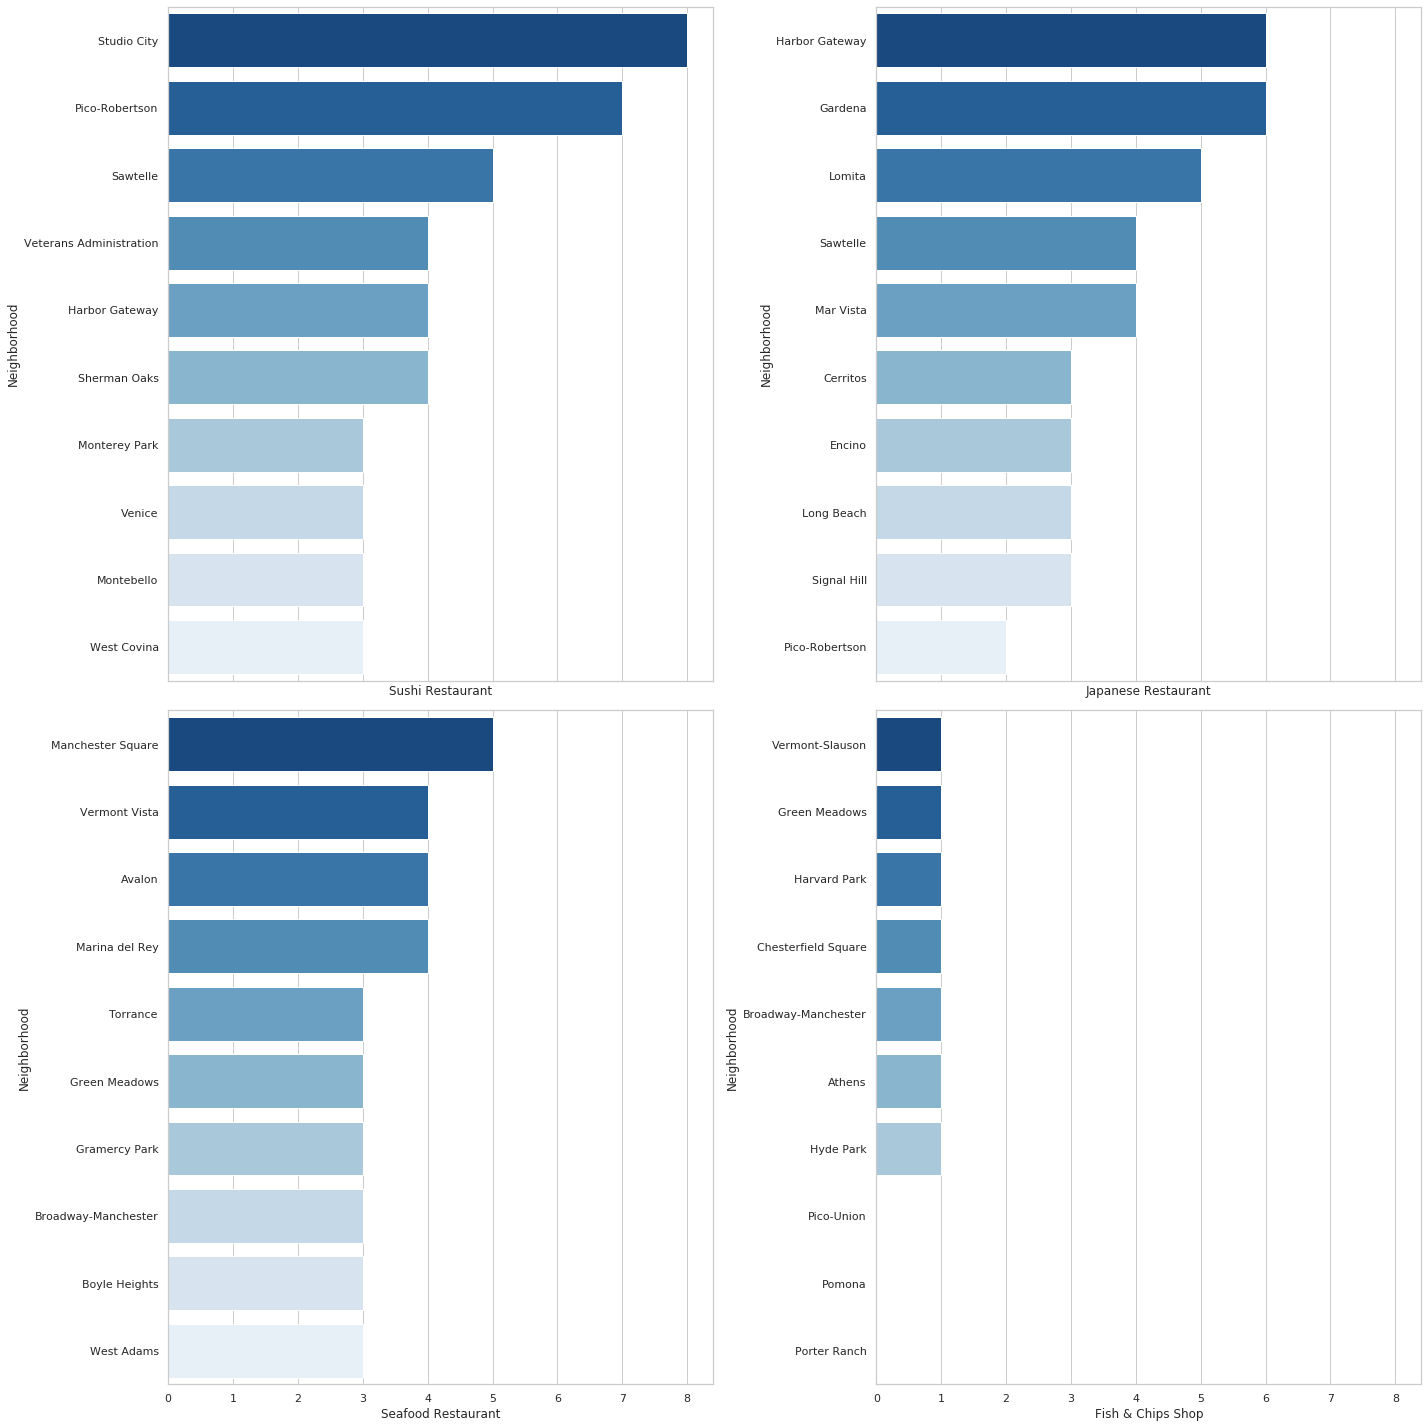

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sharex means that the axes limits are the same and that the axes are synchronized. 
# It doesn't mean that they lie on top of each other.
fig, axes = plt.subplots(2, 2, figsize=(20,20), sharex=True) # '(2, 2,' is two rows and two columns of figures

# Flatten: Being an iterator over the array, you can use it to loop over all the axes from
# the 3x2 array of axes, for i, ax in enumerate(axes. ... flatten(), where flatten() is method 
# of the numpy array. Instead of an iterator, it returns a flattened version of the array
axes = axes.flatten()

for ax, category in zip(axes, top_seafood_LA):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

# Save figure
#plt.savefig('PLOT 7 - x4 Restaurants by Neighborhood', dpi=300)

plt.tight_layout()
print('\n                     The 4 types of Restaurants, and numbers of them, sorted by neighborhood:\n')
plt.show();

> <br>Group rows by neighborhood and by taking the **average of the frequency of occurrence** of each category:<br><br>

In [107]:
# Group rows by neighborhood and by take the average of the frequency of occurrence of each category
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped.head()

,Neighborhood,Fish & Chips Shop,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant
0,Adams-Normandie,0.0,0.0,0.0,1.0
1,Agoura Hills,0.0,0.5,0.0,0.5
2,Alhambra,0.0,0.0,0.0,1.0
3,Alondra Park,0.0,0.0,0.0,1.0
4,Altadena,0.0,0.0,0.0,1.0


In [108]:
# Confirm the new size
LA_grouped.shape

(178, 5)

> <br>Print each neighborhood along with the **most common venues:**<br><br>

In [109]:
# Print each neighborhood along with the most common venues
num_top_venues = 4

for hood in LA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams-Normandie----
                 venue  freq
0     Sushi Restaurant   1.0
1    Fish & Chips Shop   0.0
2  Japanese Restaurant   0.0
3   Seafood Restaurant   0.0


----Agoura Hills----
                 venue  freq
0  Japanese Restaurant   0.5
1     Sushi Restaurant   0.5
2    Fish & Chips Shop   0.0
3   Seafood Restaurant   0.0


----Alhambra----
                 venue  freq
0     Sushi Restaurant   1.0
1    Fish & Chips Shop   0.0
2  Japanese Restaurant   0.0
3   Seafood Restaurant   0.0


----Alondra Park----
                 venue  freq
0     Sushi Restaurant   1.0
1    Fish & Chips Shop   0.0
2  Japanese Restaurant   0.0
3   Seafood Restaurant   0.0


----Altadena----
                 venue  freq
0     Sushi Restaurant   1.0
1    Fish & Chips Shop   0.0
2  Japanese Restaurant   0.0
3   Seafood Restaurant   0.0


----Arcadia----
                 venue  freq
0  Japanese Restaurant  0.67
1     Sushi Restaurant  0.33
2    Fish & Chips Shop  0.00
3   Seafood Restaurant  0.00


--

><br>Place the above into a **`pandas`** dataframe:<br><br>

In [110]:
# Write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [111]:
# create the new dataframe and display the top 4 venues for each neighborhood
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LA_grouped['Neighborhood']

for ind in np.arange(LA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Adams-Normandie,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
1,Agoura Hills,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
2,Alhambra,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
3,Alondra Park,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
4,Altadena,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
5,Arcadia,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
6,Arleta,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
7,Arlington Heights,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
8,Artesia,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
9,Athens,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant


In [112]:
# Count venues of each category in each neighborhood
venue_counts = LA_onehot.groupby('Neighborhood').sum()
venue_counts.head(10)

,Fish & Chips Shop,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant
Neighborhood,,,,
Adams-Normandie,0,0,0,1
Agoura Hills,0,1,0,1
Alhambra,0,0,0,1
Alondra Park,0,0,0,1
Altadena,0,0,0,1
Arcadia,0,2,0,1
Arleta,0,0,1,0
Arlington Heights,0,0,0,1
Artesia,0,0,0,1


><br>The count of the venues sorted by **`Seafood Restaurant`** column:<br><br>

In [115]:
# Sort decending
venue_counts.sort_values(by='Seafood Restaurant', ascending=False, inplace=True)

# Read the FIRST 5 rows of the table
venue_counts.head(11)

,Fish & Chips Shop,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant
Neighborhood,,,,
Manchester Square,0,0,5,0
Avalon,0,0,4,0
Marina del Rey,0,1,4,1
Vermont Vista,0,0,4,0
Broadway-Manchester,1,0,3,0
Gramercy Park,0,0,3,0
Green Meadows,1,0,3,0
Torrance,0,1,3,0
West Adams,0,0,3,0


In [116]:
LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)
print("\n!! Drop 'Neighborhood' column to calculate clusters !!\n")


!! Drop 'Neighborhood' column to calculate clusters !!



In [117]:
# Confirm column has been dropped
LA_grouped_clustering.head()

,Fish & Chips Shop,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant
0,0.0,0.0,0.0,1.0
1,0.0,0.5,0.0,0.5
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [118]:
LA_grouped_clustering.shape

(178, 4)

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item10'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 2.4 Selecting the **`optimal number of clusters`**:<br>

<a id='item11'></a>
> ## <br>The **Elbow Method** for selecting **optimal k**:<br>

The relationship is graphed between the number of clusters and WCSS (Within Cluster Sum of Squares) between the **number of clusters** and **`WCSS`**. Select the number of clusters where the change in WCSS begins to level off **(elbow method)**. WCSS is the sum of the centroid and its squared distance between each member of the cluster.

In [119]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [120]:
sum_of_squared_distances = []
K = range(1,21)
for k in K:
    print(k, end='K ')
    kmeans = KMeans(n_clusters=k).fit(LA_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1K 2K 3K 4K 5K 6K 7K 8K 9K 10K 11K 12K 13K 14K 15K 16K 17K 18K 19K 20K 

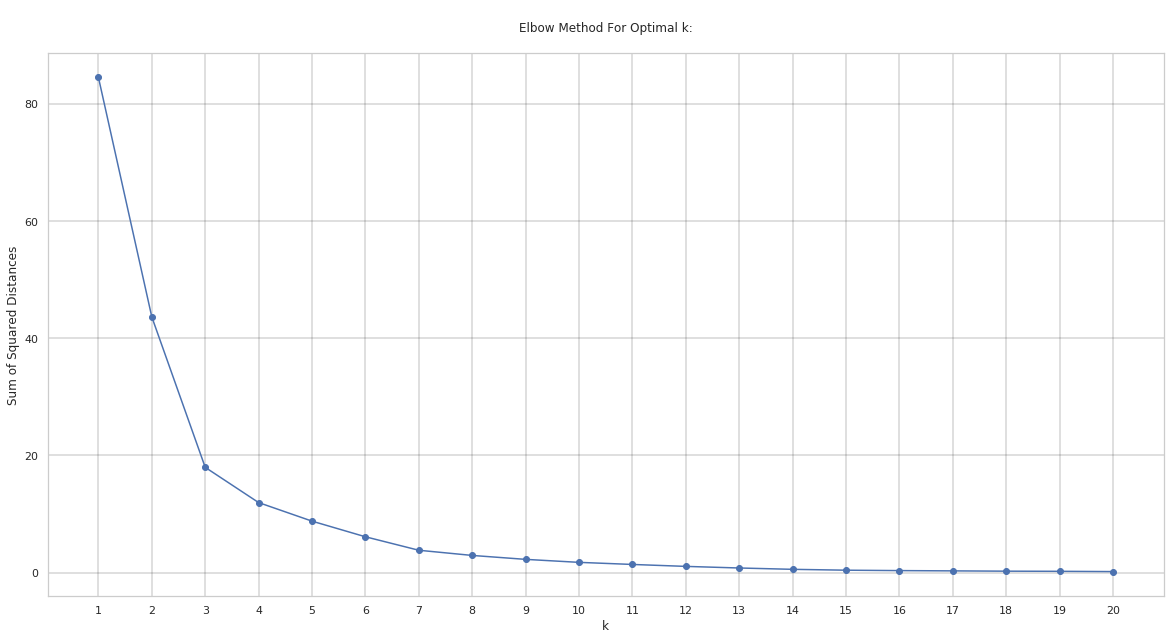

In [121]:
plt.figure(figsize=(20,10))
plt.grid(color='black', linestyle='-', linewidth=0.25)
plt.plot(K, sum_of_squared_distances, 'bo-') # See markers: https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) # Show each k on x axis, instead of 0, 2.5, 5 etc
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('\nElbow Method For Optimal k:\n');
#plt.savefig('PLOT 8 - Elbow Method For Optimal k.png')

> #### <br>Using **ELBOW METHOD**, the **optimum number of clusters** is: **8**!<br><br>

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item12'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

> ## <br>The **Silhouette Method** for selecting **optimal k**:<br><br>

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation)

In [122]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,21)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end='k ')
    kmeans = KMeans(n_clusters = k).fit(LA_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(LA_grouped_clustering, labels, metric = 'euclidean'))

2k 3k 4k 5k 6k 7k 8k 9k 10k 11k 12k 13k 14k 15k 16k 17k 18k 19k 20k 

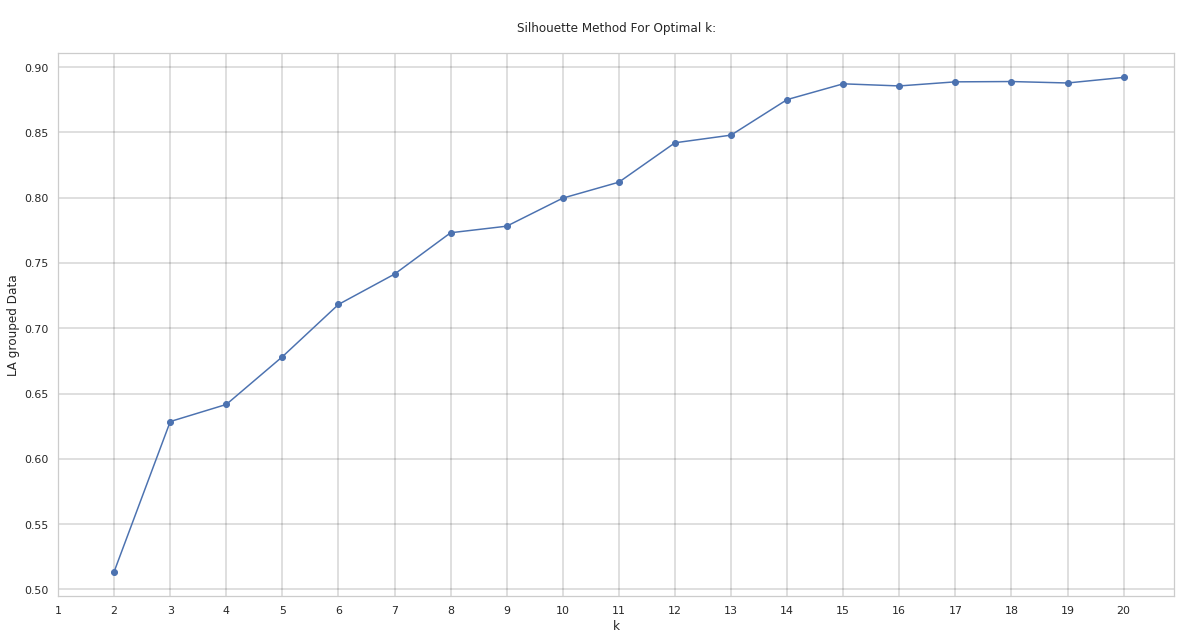

In [123]:
plt.figure(figsize=(20,10))
plt.grid(color='black', linestyle='-', linewidth=0.25)
plt.plot(K_sil, sil, 'bo-') # See markers: https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) # Show each k on x axis, instead of 0, 2.5, 5 etc
plt.xlabel('k')
plt.ylabel('LA grouped Data')
plt.title('\nSilhouette Method For Optimal k:\n')
plt.show()
#plt.savefig('PLOT 9 - Silhouette Method For Optimal k.png')

> #### <br>The **SILHOUETTE METHOD** is secondary to the **Elbow method**; it peaks at 4, but this will give us a very broad cluster.<br><br>The next peak is at k = 8 `which is the same` as the Elbows Method's optimal k of 8. Therefore the **optimum number of clusters** are: **8**!<br><br>

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item13'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

> ## <br>The **Gap Statistics** for selecting **optimal k**:<br><br>

**Gap Statistics**
The results of Kmeans algorithm firmly rely on the choice of K. By and large the best K is located at the 'elbow' of the clusters inertia while K increases. The main aim of this methodology is to juxtapose the clusters inertia on the data to cluster and a reference dataset. The optimal choice of K is given by k for which the gap between the two results is maximum.


   Result of KMeans increasing K:



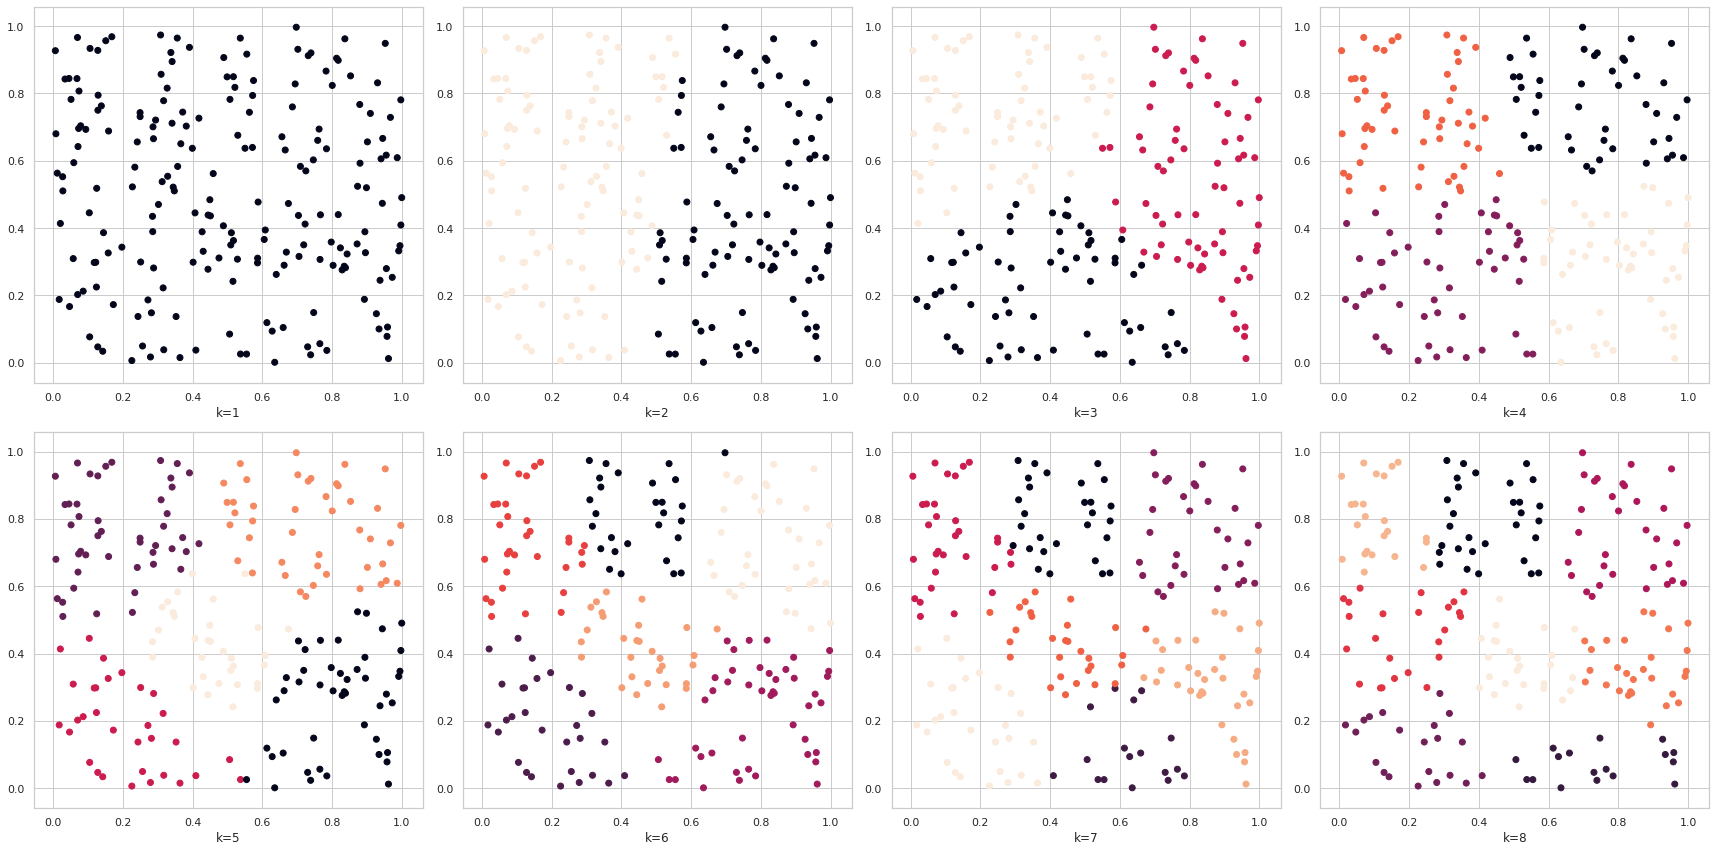

In [124]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

reference = np.random.rand(200, 2)
plt.figure(figsize=(24, 12))
for k in range(1,9):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(reference)
    plt.subplot(2,4,k)
    plt.scatter(reference[:, 0], reference[:, 1], c=a)
    plt.xlabel('k='+str(k))   

plt.tight_layout()
print('\n   Result of KMeans increasing K:\n')
plt.show()
#plt.savefig('PLOT 11 - Result of KMeans increasing K.png')

> <br>From the figure above, we can see that the algorithm evenly splits the points K clusters **even if there's no separation between** them.<br>Below, let’s now do the same on a target dataset with 8 natural clusters.<br><br>


   No. Clusters with increasing K:



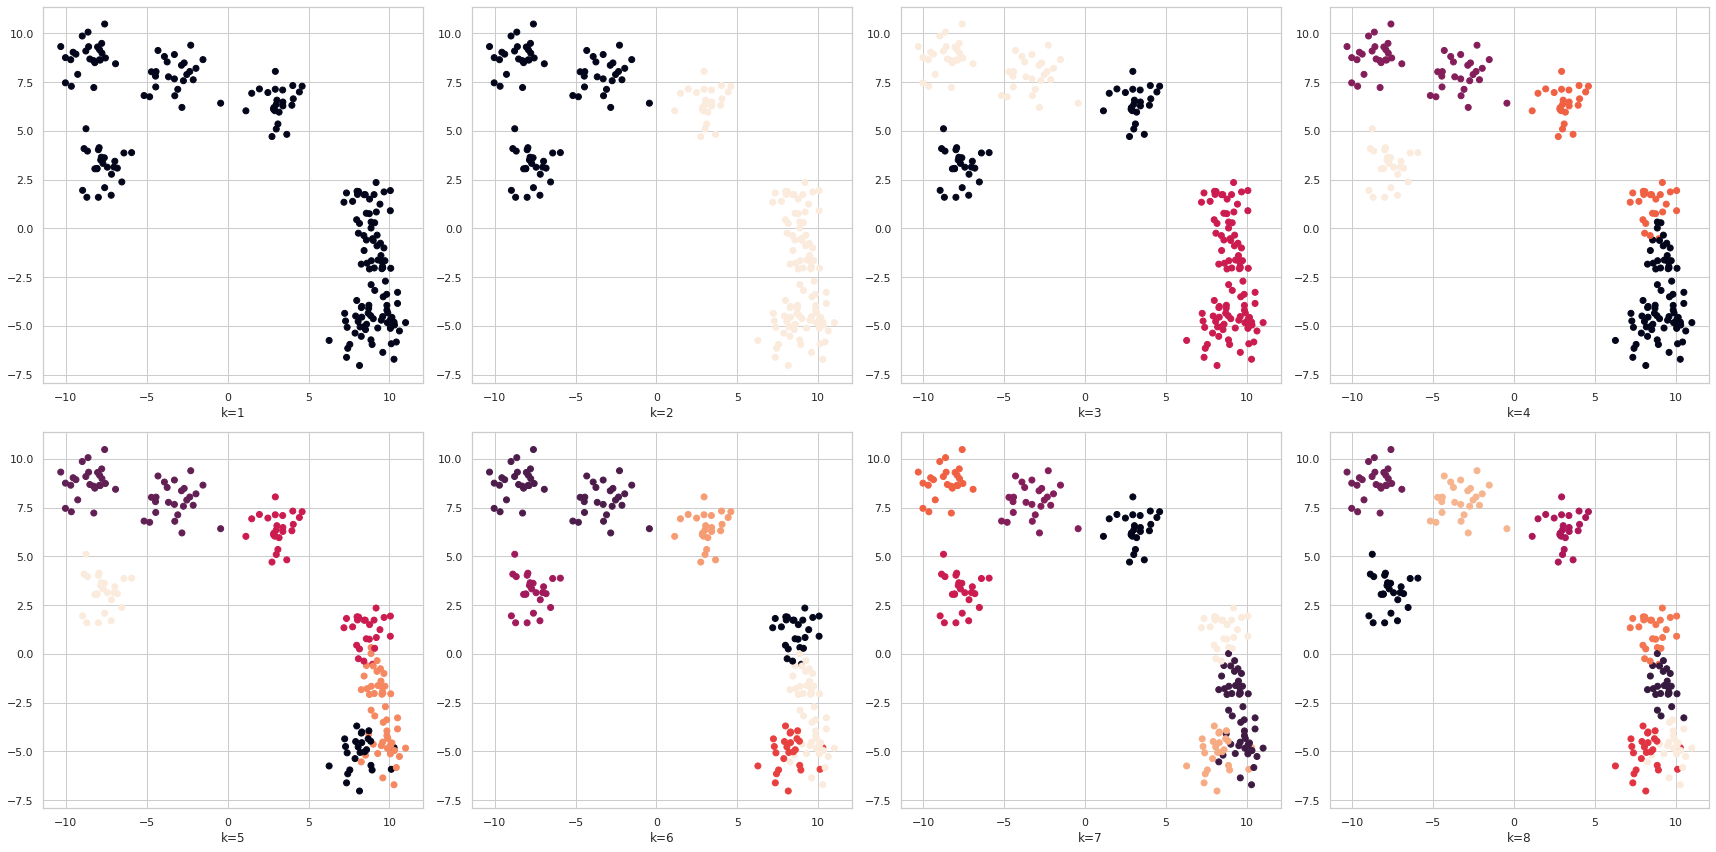

In [125]:
X = make_blobs(n_samples=200, n_features=4,
               centers=8, cluster_std=.8,)[0]

plt.figure(figsize=(24, 12))
for k in range(1,9):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(X)
    plt.subplot(2,4,k)
    plt.scatter(X[:, 0], X[:, 1], c=a)
    plt.xlabel('k='+str(k))
plt.tight_layout()
print('\n   No. Clusters with increasing K:\n')
plt.show()
#plt.savefig('PLOT 12 - No. Clusters increasing K.png')

> <br>**K=8** correctly isolates the clusters.<br>Below we will plot the **`inertia`** (a minimizing criterion known as the inertia or within-cluster sum-of-squares):<br><br>


        Inertia for both plots (11 and 12 above):



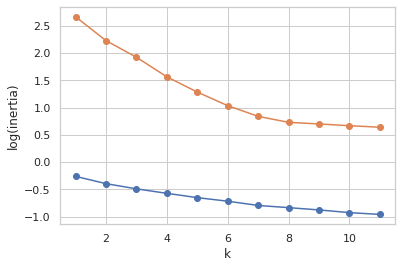

In [126]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=11, n_references=4):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 11
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), X, k_max)


plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
print("\n        Inertia for both plots (11 and 12 above):\n")
plt.show()
#plt.savefig('PLOT 13 - Inertia in both plots 11 and 12.png')

> <br>The dataset takes the shape of an **`elbow (orange)`**! It is clear that the correct k is **K=8**!<br>Below we will calculate the difference of the two curves shown above:<br><br>


        Gap Statistics for each K:



Text(0.5, 0, 'k')

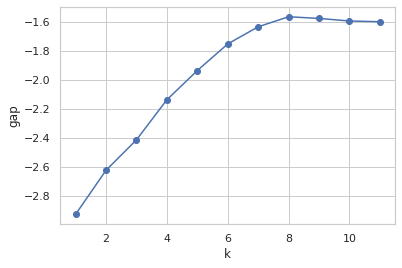

In [127]:
print("\n        Gap Statistics for each K:\n")
plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')
#plt.savefig('PLOT 14 - Gap Statistics for each K.png')

> <br>The **GAP** (distance from each) is **`maximum for K=8`**!<br>Thus, confirmed AGAIN, **k=8** is optimal!<br><br>

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item14'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 2.5 **`k-Means Clustering`** - Unsupervised Machine Learning Algorithm:<br>

><br>Run **K-means clustering** from **`derived K=8`**:<br><br>

In [128]:
# Set no of clusters
kclusters = 8

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 3, 3, 3, 4, 2, 3, 3, 6], dtype=int32)

><br>Create a new df with the **`cluster`**, as well as the **top 10 venues for each neighborhood**:<br><br>

In [129]:
# Add the clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LA_merged = LA_data

# Merge LA_merged with LA_data to add latitude / longitude for each neighborhood
LA_merged = LA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

LA_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Acton,34.497355,-118.169810,NaN,NaN,NaN,NaN,NaN
1,Adams-Normandie,34.031461,-118.300208,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
2,Agoura Hills,34.146736,-118.759885,4.0,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
3,Agua Dulce,34.504927,-118.317104,NaN,NaN,NaN,NaN,NaN
4,Alhambra,34.085539,-118.136512,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop


In [130]:
# View 1st 5 rows
LA_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Acton,34.497355,-118.169810,NaN,NaN,NaN,NaN,NaN
1,Adams-Normandie,34.031461,-118.300208,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
2,Agoura Hills,34.146736,-118.759885,4.0,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
3,Agua Dulce,34.504927,-118.317104,NaN,NaN,NaN,NaN,NaN
4,Alhambra,34.085539,-118.136512,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop


In [131]:
# Rows and columns before drop
LA_merged.shape

(272, 8)

In [132]:
# Delete NaN rows. Keep the DataFrame with valid entries in the same variable.
LA_merged.dropna(inplace=True)

In [133]:
LA_merged.head(20)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
1,Adams-Normandie,34.031461,-118.300208,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
2,Agoura Hills,34.146736,-118.759885,4.0,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
4,Alhambra,34.085539,-118.136512,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
5,Alondra Park,33.889617,-118.335156,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
6,Artesia,33.866896,-118.080101,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
7,Altadena,34.193871,-118.136239,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
9,Arcadia,34.133230,-118.030419,4.0,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
10,Arleta,34.243100,-118.430757,2.0,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
11,Arlington Heights,34.044910,-118.323408,3.0,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
12,Athens,33.923693,-118.304656,6.0,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant


In [134]:
# Rows and columns after drop
LA_merged.shape

(178, 8)

In [135]:
# Get all columns' names
LA_merged.columns

Index(['Neighborhood', 'Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue'],
      dtype='object')

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item15'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 2.6 **`Visualize`** the clusters:<br>

> <br>Visualize **`k=8`** clusters on an interactive **map**:<br><br>

In [136]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# Color scheme for clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for cluster in range(0, kclusters): 
    group = folium.FeatureGroup(name='<span style=\\"color: {0};\\">{1}</span>'.format(rainbow[cluster-1],cluster))
    for lat, lon, poi, label in zip(LA_merged['Latitude'], LA_merged['Longitude'], LA_merged['Neighborhood'], LA_merged['Cluster Labels']):
        if int(label) == cluster: 
            label = folium.Popup(" "+ str(poi) + " (Cluster No: " + str(cluster) + ")", parse_html=True)
            folium.CircleMarker(
                (lat, lon),
                radius=5,
                popup=label,
                color=rainbow[cluster-1],
                fill=True,
                fill_color=rainbow[cluster-1],
                fill_opacity=0.35).add_to(group)
    group.add_to(map_clusters)

folium.TileLayer('openstreetmap').add_to(map_clusters)
folium.TileLayer('Stamen Terrain').add_to(map_clusters)
folium.map.LayerControl('topright', collapsed=False).add_to(map_clusters)
    
# Save it as html
#map_usa_la.save('MAP 4 - Visualize clusters.html')

print('\nVisualize clusters:\n')
map_clusters


Visualize clusters:



Maps are **not displaying** on GitHub, I have inserted an image of the map the code generates below:

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Big%20Fish%20-%20Map%204.jpg?raw=true" alt="Map 4" align="left" width="100%" height="100%">

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item16'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

# 2.7 **`Scrutinize`** the clusters:<br>

In [137]:
# 0 = Neighborhood, # 4 = 1st Most Common Venue, # 5 = 2nd Most Common Venue
required_column_indices = [0, 4, 5]
required_column = [list(LA_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [0, 4, 5]

---

## Cluster 0:<br>

In [138]:
cluster_0 = LA_merged.loc[LA_merged['Cluster Labels'] == 0, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_0

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
43,Century City,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
48,Cheviot Hills,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
70,East La Mirada,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
75,Echo Park,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
76,El Monte,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
86,Florence,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
88,Glassell Park,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
103,Walnut Park,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
109,Mar Vista,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant,Fish & Chips Shop
111,Historic South-Central,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop


In [139]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Florence                  1
La Canada Flintridge      1
Signal Hill               1
Century City              1
Historic South-Central    1
Hollywood Hills           1
Echo Park                 1
Hollywood Hills West      1
South San Gabriel         1
East La Mirada            1
Mid-Wilshire              1
Long Beach                1
Glassell Park             1
La Verne                  1
Santa Clarita             1
West Carson               1
South El Monte            1
El Monte                  1
Wilmington                1
Westlake                  1
Winnetka                  1
Lawndale                  1
Walnut Park               1
Mar Vista                 1
Huntington Park           1
Lakewood                  1
University Park           1
Lomita                    1
Norwalk                   1
Cheviot Hills             1
Name: Neighborhood, dtype: int64
---------------------------------------------
Japanese Restaurant    30
Name: 1st Most Common Venue, dtype: int64
-------------

> ### <br>Cluster 0:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Japanese Restaurant = 30</strong><br> 
> ------------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Sushi Restaurant = 26</strong><br><br>

---

## Cluster 1:<br>

In [140]:
cluster_1 = LA_merged.loc[LA_merged['Cluster Labels'] == 1, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
16,Azusa,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
21,Bellflower,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
26,Beverly Grove,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
28,Koreatown,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
30,Beverlywood,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
38,Carthay,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
45,Charter Oak,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
62,Desert View Highlands,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
64,Downey,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
107,Hermosa Beach,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop


In [141]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Industry                    1
Westwood                    1
Sherman Oaks                1
Koreatown                   1
Los Feliz                   1
Woodland Hills              1
West Hollywood              1
Downey                      1
La Puente                   1
West Whittier-Los Nietos    1
Bellflower                  1
Beverly Grove               1
Larchmont                   1
Westlake Village            1
Carthay                     1
Manhattan Beach             1
Charter Oak                 1
Azusa                       1
Hermosa Beach               1
Redondo Beach               1
San Pasqual                 1
Desert View Highlands       1
San Marino                  1
Beverlywood                 1
Veterans Administration     1
Name: Neighborhood, dtype: int64
---------------------------------------------
Sushi Restaurant      24
Seafood Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Seafood Restaurant    24
Sushi Re

> ### <br>Cluster 1:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Sushi Restaurant = 24</strong><br> 
> -----------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Seafood Restaurant = 24</strong><br><br>

---

## Cluster 2:<br>

In [142]:
cluster_2 = LA_merged.loc[LA_merged['Cluster Labels'] == 2, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
10,Arleta,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
14,Avalon,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
22,Bell Gardens,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
24,Bell,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
37,Carson,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
42,Central-Alameda,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
49,Chinatown,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
53,Commerce,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
55,Cypress Park,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
58,Cudahy,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop


In [143]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Maywood                    1
El Sereno                  1
Pico-Union                 1
Panorama City              1
El Segundo                 1
Vernon                     1
Manchester Square          1
Sylmar                     1
Commerce                   1
Sun Valley                 1
Universal City             1
Willowbrook                1
Inglewood                  1
Avalon                     1
South Park                 1
Van Nuys                   1
Vermont Square             1
View Park-Windsor Hills    1
North Hills                1
Watts                      1
Gramercy Park              1
Mayflower Village          1
Arleta                     1
Vermont Vista              1
Lake Balboa                1
Bell                       1
Cypress Park               1
Elysian Valley             1
East Compton               1
Hawthorne                  1
Chinatown                  1
Cudahy                     1
Reseda                     1
West Adams                 1
Westmont      

> ### <br>Cluster 2:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Seafood Restaurant = 47</strong><br> 
> -----------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Sushi Restaurant = 47</strong><br><br>

---

## Cluster 3:<br>

In [144]:
cluster_3 = LA_merged.loc[LA_merged['Cluster Labels'] == 3, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
1,Adams-Normandie,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
4,Alhambra,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
5,Alondra Park,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
6,Artesia,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
7,Altadena,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
11,Arlington Heights,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
27,Burbank,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
36,Canoga Park,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
56,La Mirada,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop
59,Culver City,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Fish & Chips Shop


In [145]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pico-Robertson       1
Adams-Normandie      1
East Pasadena        1
Burbank              1
Alondra Park         1
Monrovia             1
Montebello           1
Diamond Bar          1
Canoga Park          1
Hancock Park         1
Studio City          1
Artesia              1
San Dimas            1
Sierra Madre         1
La Mirada            1
West Covina          1
Valley Village       1
Porter Ranch         1
Valley Glen          1
Venice               1
Altadena             1
Harbor City          1
Toluca Lake          1
North El Monte       1
East Los Angeles     1
Hollywood            1
Alhambra             1
Sunland              1
Stevenson Ranch      1
Culver City          1
Arlington Heights    1
Mid-City             1
Fairfax              1
Harvard Heights      1
Name: Neighborhood, dtype: int64
---------------------------------------------
Sushi Restaurant    34
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Seafood Restaurant     30
Ja

> ### <br>Cluster 3:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Sushi Restaurant = 34</strong><br> 
> -----------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Seafood Restaurant = 30</strong><br><br>

---

## Cluster 4:<br>

In [146]:
cluster_4 = LA_merged.loc[LA_merged['Cluster Labels'] == 4, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
2,Agoura Hills,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
9,Arcadia,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
13,Atwater Village,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
40,Chatsworth,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
44,Cerritos,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Fish & Chips Shop
50,Citrus,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
52,Northridge,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
61,Del Rey,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
74,East San Gabriel,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop
82,Encino,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Fish & Chips Shop


In [147]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Del Rey             1
Windsor Square      1
Northridge          1
Cerritos            1
Encino              1
West Los Angeles    1
Temple City         1
Citrus              1
Atwater Village     1
Arcadia             1
South Pasadena      1
Silver Lake         1
North Hollywood     1
Chatsworth          1
Rancho Park         1
Gardena             1
Harbor Gateway      1
Palmdale            1
Sawtelle            1
Agoura Hills        1
Monterey Park       1
San Pedro           1
East San Gabriel    1
Name: Neighborhood, dtype: int64
---------------------------------------------
Sushi Restaurant       14
Japanese Restaurant     9
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Japanese Restaurant    14
Sushi Restaurant        9
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


> ### <br>Cluster 4:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Sushi Restaurant = 14</strong><br> 
> ------------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Japanese Restaurant = 14</strong><br><br>

---

## Cluster 5:<br>

In [148]:
cluster_5 = LA_merged.loc[LA_merged['Cluster Labels'] == 5, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
17,Vermont-Slauson,Fish & Chips Shop,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant
47,Chesterfield Square,Fish & Chips Shop,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant


In [149]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chesterfield Square    1
Vermont-Slauson        1
Name: Neighborhood, dtype: int64
---------------------------------------------
Fish & Chips Shop    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Sushi Restaurant    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


> ### <br>Cluster 5:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Fish & Chips Shop = 2</strong><br> 
> --------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Sushi Restaurant = 2</strong><br><br>

---

## Cluster 6:<br>

In [150]:
cluster_6 = LA_merged.loc[LA_merged['Cluster Labels'] == 6, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_6

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
12,Athens,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant
34,Broadway-Manchester,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant
89,Green Meadows,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant
102,Harvard Park,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant
116,Hyde Park,Seafood Restaurant,Fish & Chips Shop,Sushi Restaurant,Japanese Restaurant


In [151]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Hyde Park              1
Harvard Park           1
Green Meadows          1
Athens                 1
Broadway-Manchester    1
Name: Neighborhood, dtype: int64
---------------------------------------------
Seafood Restaurant    5
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fish & Chips Shop    5
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


> ### <br>Cluster 6:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Seafood Restaurant = 5</strong><br> 
> ----------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Fish & Chips Shop = 5</strong><br><br>

---

## Cluster 7:<br>

In [152]:
cluster_7 = LA_merged.loc[LA_merged['Cluster Labels'] == 7, LA_merged.columns[[0] + list(range(4, LA_merged.shape[1]))]]
cluster_7

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
31,Boyle Heights,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
57,Covina,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
65,Downtown,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
69,East Hollywood,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
96,Hacienda Heights,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
150,Marina del Rey,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
175,Palms,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
183,Pomona,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
199,San Fernando,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop
202,San Gabriel,Seafood Restaurant,Japanese Restaurant,Sushi Restaurant,Fish & Chips Shop


In [153]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Westchester         1
Boyle Heights       1
Hacienda Heights    1
Covina              1
East Hollywood      1
Downtown            1
Palms               1
Marina del Rey      1
Pomona              1
Torrance            1
San Fernando        1
San Gabriel         1
Name: Neighborhood, dtype: int64
---------------------------------------------
Seafood Restaurant    12
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Japanese Restaurant    11
Sushi Restaurant        1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


> ### <br>Cluster 7:<br><br>
> <strong>1st</strong> Most Common Venue: <strong>Seafood Restaurant = 12</strong><br> 
> -----------------------------------------------------------<br>
> <strong>2nd</strong> Most Common Venue: <strong>Japanese Restaurant = 11</strong><br><br>

---

**Summary - Select `Cluster 2`**:<br>
- 1st Most Common Venue: Seafood Restaurant with 47
- 2nd Most Common Venue: Sushi Restaurant with 47

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<a id='item17'></a>
<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong><h1>Part 3 - Synopsis:</h1></strong>
</div>

---

# 3.1 **`Synopsis`**:

<div class="alert alert-block alert-danger" style="margin-top: 20px">
<strong><h3>Choosing the NEIGHBORHOOD in the coastal city with most:</h3><br></strong>1st Seafood and,<br>2nd Sushi restaurants:
</div>

><br>Import the **LA_venues dataframe**, before changes were made:<br><br>

In [154]:
# Use data in .CSV to populate a dataframe
synopsis_df = pd.read_csv('./0. LA_venues_before_changes.csv')

# Read the FIRST 5 rows of the table
synopsis_df.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Acton,34.497355,-118.16981,Crazy Otto's Diner,34.490733,-118.162548,Breakfast Spot
1,1,Acton,34.497355,-118.16981,First Class Cakes,34.489885,-118.160798,Cupcake Shop
2,2,Acton,34.497355,-118.16981,Perkin' Up Coffee House,34.490303,-118.160742,Café
3,3,Acton,34.497355,-118.16981,Pizza Factory,34.490011,-118.161091,Pizza Place
4,4,Acton,34.497355,-118.16981,Grizzly Bears Burgers,34.490076,-118.162006,Burger Joint


In [155]:
# Delete a column
synopsis_df.drop('Unnamed: 0', axis=1, inplace=True)

In [156]:
# Rows and columns
synopsis_df.shape

(8328, 7)

In [157]:
# Read the FIRST 5 rows of the table
synopsis_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,34.497355,-118.16981,Crazy Otto's Diner,34.490733,-118.162548,Breakfast Spot
1,Acton,34.497355,-118.16981,First Class Cakes,34.489885,-118.160798,Cupcake Shop
2,Acton,34.497355,-118.16981,Perkin' Up Coffee House,34.490303,-118.160742,Café
3,Acton,34.497355,-118.16981,Pizza Factory,34.490011,-118.161091,Pizza Place
4,Acton,34.497355,-118.16981,Grizzly Bears Burgers,34.490076,-118.162006,Burger Joint


><br>**Delete all rows** which do not contain **`'Seafood Restaurant'`** and **`'Sushi Restaurant'`**:<br><br>

In [158]:
# Delete all rows which does not contain our venue Category
indexNames = synopsis_df[ (synopsis_df['Venue Category'] != 'Seafood Restaurant') & (synopsis_df['Venue Category'] != 'Sushi Restaurant') ].index
    
synopsis_df.drop(indexNames , inplace=True)

# reset index, because we dropped rows
synopsis_df.reset_index(drop=True, inplace=True)

# Read the FIRST 20 rows of the table
synopsis_df.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
1,Agoura Hills,34.146736,-118.759885,Beji Sushi,34.144398,-118.755020,Sushi Restaurant
2,Alhambra,34.085539,-118.136512,Sheng Sushi,34.092368,-118.133315,Sushi Restaurant
3,Alondra Park,33.889617,-118.335156,Wasabi Sushiya,33.884904,-118.326141,Sushi Restaurant
4,Artesia,33.866896,-118.080101,Magic Touch Bullet Train Sushi,33.858064,-118.080325,Sushi Restaurant
5,Altadena,34.193871,-118.136239,Junzo's,34.196484,-118.133316,Sushi Restaurant
6,Arcadia,34.133230,-118.030419,Maki & Sushi Arcadia,34.139862,-118.023871,Sushi Restaurant
7,Arleta,34.243100,-118.430757,Mariscos El Bigoton,34.241010,-118.427620,Seafood Restaurant
8,Arlington Heights,34.044910,-118.323408,Sushi Hon,34.053957,-118.320312,Sushi Restaurant
9,Athens,33.923693,-118.304656,Fishbone Seafood,33.915977,-118.308849,Seafood Restaurant


In [159]:
# Rows and columns
synopsis_df.shape

(297, 7)

><br>**View Cluster 2**, which was the **purest form** of **`'1st. Seafood Restaurants'`** and **`'2nd. Sushi Restaurants'`**:<br><br>

In [160]:
# View cluster 2
cluster_2.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
10,Arleta,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
14,Avalon,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
22,Bell Gardens,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
24,Bell,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
37,Carson,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
42,Central-Alameda,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
49,Chinatown,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
53,Commerce,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
55,Cypress Park,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop
58,Cudahy,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Fish & Chips Shop


><br>**Remove** all **neighborhoods** from dataframe which are not in **`Cluster 1`**:<br><br>

In [161]:
# Get list from column
cluster_2["Neighborhood"].values

array(['Arleta', 'Avalon', 'Bell Gardens', 'Bell', 'Carson',
       'Central-Alameda', 'Chinatown', 'Commerce', 'Cypress Park',
       'Cudahy', 'East Compton', 'El Segundo', 'El Sereno',
       'Elysian Valley', 'Vermont Square', 'Exposition Park',
       'Vermont Vista', 'Gramercy Park', 'Hawthorne', 'Highland Park',
       'Inglewood', 'Jefferson Park', 'Lake Balboa', 'Watts', 'Lennox',
       'Lynwood', 'Manchester Square', 'Mayflower Village', 'Maywood',
       'West Adams', 'North Hills', 'Pacoima', 'Panorama City',
       'Pico-Union', 'Reseda', 'Santa Fe Springs', 'South Gate',
       'South Park', 'Sylmar', 'Sun Valley', 'Universal City', 'Van Nuys',
       'Vernon', 'View Park-Windsor Hills', 'Westmont',
       'West Puente Valley', 'Willowbrook'], dtype=object)

In [162]:
# Delete all rows whom do not cluster 2 neighborhoods
indexNames = synopsis_df[ (synopsis_df['Neighborhood'] != 'Arleta') & (synopsis_df['Neighborhood'] != 'Avalon') \
                         & (synopsis_df['Neighborhood'] != 'Bell Gardens') & (synopsis_df['Neighborhood'] != 'Bell') \
                         & (synopsis_df['Neighborhood'] != 'Carson') & (synopsis_df['Neighborhood'] != 'Central-Alameda') \
                         & (synopsis_df['Neighborhood'] != 'Chinatown') & (synopsis_df['Neighborhood'] != 'Commerce') \
                         & (synopsis_df['Neighborhood'] != 'Cypress Park') & (synopsis_df['Neighborhood'] != 'Cudahy') \
                         & (synopsis_df['Neighborhood'] != 'East Compton') & (synopsis_df['Neighborhood'] != 'El Segundo') \
                         & (synopsis_df['Neighborhood'] != 'El Sereno') & (synopsis_df['Neighborhood'] != 'Elysian Valley') \
                         & (synopsis_df['Neighborhood'] != 'Vermont Square') & (synopsis_df['Neighborhood'] != 'Exposition Park') \
                         & (synopsis_df['Neighborhood'] != 'Vermont Vista') & (synopsis_df['Neighborhood'] != 'Gramercy Park') \
                         & (synopsis_df['Neighborhood'] != 'Hawthorne') & (synopsis_df['Neighborhood'] != 'Highland Park') \
                         & (synopsis_df['Neighborhood'] != 'Inglewood') & (synopsis_df['Neighborhood'] != 'Jefferson Park') \
                         & (synopsis_df['Neighborhood'] != 'Lake Balboa') & (synopsis_df['Neighborhood'] != 'Watts') \
                         & (synopsis_df['Neighborhood'] != 'Lennox') & (synopsis_df['Neighborhood'] != 'Lynwood') \
                         & (synopsis_df['Neighborhood'] != 'Manchester Square') & (synopsis_df['Neighborhood'] != 'Mayflower Village') \
                         & (synopsis_df['Neighborhood'] != 'Maywood') & (synopsis_df['Neighborhood'] != 'West Adams') \
                         & (synopsis_df['Neighborhood'] != 'North Hills') & (synopsis_df['Neighborhood'] != 'Pacoima') \
                         & (synopsis_df['Neighborhood'] != 'Panorama City') & (synopsis_df['Neighborhood'] != 'Pico-Union') \
                         & (synopsis_df['Neighborhood'] != 'Reseda') & (synopsis_df['Neighborhood'] != 'Santa Fe Springs') \
                         & (synopsis_df['Neighborhood'] != 'South Gate') & (synopsis_df['Neighborhood'] != 'South Park') \
                         & (synopsis_df['Neighborhood'] != 'Sylmar') & (synopsis_df['Neighborhood'] != 'Sun Valley') \
                         & (synopsis_df['Neighborhood'] != 'Universal City') & (synopsis_df['Neighborhood'] != 'Van Nuys') \
                         & (synopsis_df['Neighborhood'] != 'Vernon') & (synopsis_df['Neighborhood'] != 'View Park-Windsor Hills') \
                         & (synopsis_df['Neighborhood'] != 'Westmont') & (synopsis_df['Neighborhood'] != 'Willowbrook') \
                         & (synopsis_df['Neighborhood'] != 'West Puente Valley') ].index

synopsis_df.drop(indexNames , inplace=True)

# reset index, because we dropped rows
synopsis_df.reset_index(drop=True, inplace=True)

# Read the FIRST 20 rows of the table
synopsis_df.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arleta,34.243100,-118.430757,Mariscos El Bigoton,34.241010,-118.427620,Seafood Restaurant
1,Avalon,33.336954,-118.327332,NDMK,33.342775,-118.324714,Seafood Restaurant
2,Avalon,33.336954,-118.327332,Lobster Trap,33.342755,-118.325736,Seafood Restaurant
3,Avalon,33.336954,-118.327332,Bluewater Avalon,33.344276,-118.326165,Seafood Restaurant
4,Avalon,33.336954,-118.327332,El Galleon,33.343617,-118.325733,Seafood Restaurant
5,Bell Gardens,33.965686,-118.149936,El Coraloense,33.962456,-118.147902,Seafood Restaurant
6,Bell,33.981161,-118.179166,Mariscos bahia,33.983419,-118.186414,Seafood Restaurant
7,Carson,33.839520,-118.248010,Rockin' Cajun Seafood And Grill,33.839610,-118.258397,Seafood Restaurant
8,Carson,33.839520,-118.248010,House of Seafood,33.840153,-118.258322,Seafood Restaurant
9,Central-Alameda,34.006864,-118.247213,Pescaderia Puerto Peñasco,34.004310,-118.242489,Seafood Restaurant


In [163]:
# Rows and columns
synopsis_df.shape

(74, 7)

In [164]:
# Sort on the neighborhood column to have all venues together
synopsis_df.sort_values(by='Neighborhood', ascending=False)

# Read the FIRST 20 rows of the table
synopsis_df.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arleta,34.243100,-118.430757,Mariscos El Bigoton,34.241010,-118.427620,Seafood Restaurant
1,Avalon,33.336954,-118.327332,NDMK,33.342775,-118.324714,Seafood Restaurant
2,Avalon,33.336954,-118.327332,Lobster Trap,33.342755,-118.325736,Seafood Restaurant
3,Avalon,33.336954,-118.327332,Bluewater Avalon,33.344276,-118.326165,Seafood Restaurant
4,Avalon,33.336954,-118.327332,El Galleon,33.343617,-118.325733,Seafood Restaurant
5,Bell Gardens,33.965686,-118.149936,El Coraloense,33.962456,-118.147902,Seafood Restaurant
6,Bell,33.981161,-118.179166,Mariscos bahia,33.983419,-118.186414,Seafood Restaurant
7,Carson,33.839520,-118.248010,Rockin' Cajun Seafood And Grill,33.839610,-118.258397,Seafood Restaurant
8,Carson,33.839520,-118.248010,House of Seafood,33.840153,-118.258322,Seafood Restaurant
9,Central-Alameda,34.006864,-118.247213,Pescaderia Puerto Peñasco,34.004310,-118.242489,Seafood Restaurant


In [165]:
# Delete a column
synopsis_df.drop('Neighborhood Longitude', axis=1, inplace=True)

In [166]:
# Delete a column
synopsis_df.drop('Neighborhood Latitude', axis=1, inplace=True)

In [167]:
# View changes
synopsis_df.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arleta,Mariscos El Bigoton,34.241010,-118.427620,Seafood Restaurant
1,Avalon,NDMK,33.342775,-118.324714,Seafood Restaurant
2,Avalon,Lobster Trap,33.342755,-118.325736,Seafood Restaurant
3,Avalon,Bluewater Avalon,33.344276,-118.326165,Seafood Restaurant
4,Avalon,El Galleon,33.343617,-118.325733,Seafood Restaurant


In [168]:
# Check data types
synopsis_df.dtypes

Neighborhood        object
Venue               object
Venue Latitude     float64
Venue Longitude    float64
Venue Category      object
dtype: object

In [169]:
# Rename columns
synopsis_df.rename(columns = {'Venue Latitude':'Latitude',\
                              'Venue Longitude':'Longitude'}, inplace = True)

In [170]:
# View changes
synopsis_df.head()

,Neighborhood,Venue,Latitude,Longitude,Venue Category
0,Arleta,Mariscos El Bigoton,34.241010,-118.427620,Seafood Restaurant
1,Avalon,NDMK,33.342775,-118.324714,Seafood Restaurant
2,Avalon,Lobster Trap,33.342755,-118.325736,Seafood Restaurant
3,Avalon,Bluewater Avalon,33.344276,-118.326165,Seafood Restaurant
4,Avalon,El Galleon,33.343617,-118.325733,Seafood Restaurant


In [171]:
# Check data types
synopsis_df.dtypes

Neighborhood       object
Venue              object
Latitude          float64
Longitude         float64
Venue Category     object
dtype: object

In [174]:
# Geopandas is used 'points_from_xy()' to transform Longitude and Latitude into a list of shapely. A GeoDataFrame requires a shapely object. 
# Point objects - set it as a geometry while creating the GeoDataFrame. 
import geopandas as geopandas
LA_geo = geopandas.GeoDataFrame(
    synopsis_df, geometry=geopandas.points_from_xy(synopsis_df.Longitude, synopsis_df.Latitude))

In [175]:
# View dataframe
LA_geo.head()

,Neighborhood,Venue,Latitude,Longitude,Venue Category,geometry
0,Arleta,Mariscos El Bigoton,34.241010,-118.427620,Seafood Restaurant,POINT (-118.42762 34.24101)
1,Avalon,NDMK,33.342775,-118.324714,Seafood Restaurant,POINT (-118.324714 33.342775)
2,Avalon,Lobster Trap,33.342755,-118.325736,Seafood Restaurant,POINT (-118.3257356115846 33.34275477645674)
3,Avalon,Bluewater Avalon,33.344276,-118.326165,Seafood Restaurant,POINT (-118.3261645087374 33.34427586921529)
4,Avalon,El Galleon,33.343617,-118.325733,Seafood Restaurant,POINT (-118.3257334647163 33.34361722981673)


In [176]:
# Convert a non-naive geometry
LA_geo = LA_geo.set_crs(epsg=4326) 

In [177]:
# Convert points to GeoJSON
points_gjson = folium.features.GeoJson(LA_geo, name="The clustered neighborhoods with venues")

In [178]:
# Check the GeoJSON features
# points_gjson.data.get('features')

[{'id': '0',
  'type': 'Feature',
  'properties': {'Latitude': 34.241009999999996,
   'Longitude': -118.42761999999999,
   'Neighborhood': 'Arleta',
   'Venue': 'Mariscos El Bigoton',
   'Venue Category': 'Seafood Restaurant'},
  'geometry': {'type': 'Point',
   'coordinates': [-118.42761999999999, 34.241009999999996]},
  'bbox': [-118.42761999999999,
   34.241009999999996,
   -118.42761999999999,
   34.241009999999996]},
 {'id': '1',
  'type': 'Feature',
  'properties': {'Latitude': 33.342775,
   'Longitude': -118.32471399999999,
   'Neighborhood': 'Avalon',
   'Venue': 'NDMK',
   'Venue Category': 'Seafood Restaurant'},
  'geometry': {'type': 'Point',
   'coordinates': [-118.32471399999999, 33.342775]},
  'bbox': [-118.32471399999999, 33.342775, -118.32471399999999, 33.342775]},
 {'id': '2',
  'type': 'Feature',
  'properties': {'Latitude': 33.342754776456744,
   'Longitude': -118.32573561158459,
   'Neighborhood': 'Avalon',
   'Venue': 'Lobster Trap',
   'Venue Category': 'Seafood R

`{'id': '0',
  'type': 'Feature',
  'properties': {'Latitude': 34.241009999999996,
   'Longitude': -118.42761999999999,
   'Neighborhood': 'Arleta',
   'Venue': 'Mariscos El Bigoton',
   'Venue Category': 'Seafood Restaurant'},
  'geometry': {'type': 'Point',
   'coordinates': [-118.42761999999999, 34.241009999999996]},
  'bbox': [-118.42761999999999,
   34.241009999999996,
   -118.42761999999999,
   34.241009999999996]}`

In [179]:
# Create a Map instance
Final_Map = folium.Map(location=[34.0522, -118.2437], tiles = 'OpenStreetMap', zoom_start=9, control_scale=True)

In [180]:
# Get x and y coordinates for each point
LA_geo["x"] = LA_geo["geometry"].apply(lambda geom: geom.x)
LA_geo["y"] = LA_geo["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
locations = list(zip(LA_geo["y"], LA_geo["x"] ))

In [181]:
# Import Libraries
import geopandas
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

In [182]:
# Create a folium marker cluster
# marker_cluster = MarkerCluster(locations)

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(Final_Map) # create marker clusters

for i in range(LA_geo.shape[0]):
    location = [LA_geo['Latitude'][i], LA_geo['Longitude'][i]]
    tooltip = "Venue Name: {}<br>Venue Category: {}<br>Venue Neighborhood: {}".format(LA_geo["Venue"][i], LA_geo['Venue Category'][i], LA_geo['Neighborhood'][i])
    
    folium.Marker(location, tooltip=tooltip).add_to(marker_cluster)   
    
# Save it as html
#Final_Map.save('MAP 5 - Seafood and Sushi Restaurants in Clusters.html')

print('\nSeafood and Sushi Restaurants in Clusters:\n')
   
# Show map
Final_Map


Seafood and Sushi Restaurants in Clusters:



Maps are **not displaying** on GitHub, I have inserted an image of the map the code generates below:

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Map%203.jpg?raw=true" alt="Map 6" align="left" width="100%" height="100%">

> ###  <br>Zoomed in on **Cluster of 36 above**, **result** displayed **below**:<br><br>

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Map%204.jpg?raw=true" alt="Map 5" align="left" width="100%" height="100%">

> ###  <br>Zoomed in on **Cluster of 15 above**, **result** displayed **below**:<br><br>

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Big%20Fish%20-%20Map%205.jpg?raw=true" alt="Map 5" align="left" width="100%" height="100%">

> ###  <br>Zoomed in on **Cluster of 22 above**, **result** displayed **below**:<br><br>

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Ver%202%20-%20Final%20Map%20-%205.jpg?raw=true" alt="Map 5" align="left" width="100%" height="100%">

> ###  <br>Zoomed in on **Cluster of 5 above**, **result** displayed **below**:<br><br>

<img src="https://github.com/Arri-vdm/Capstone/blob/master/Ver%202%20-%20Final%20Map%20-%206.jpg?raw=true" alt="Map 5" align="left" width="100%" height="100%">

> ###  <br>The **result** is **5 Seafood Restaurants**,  within 1km of **Manchester Square**:<br><br>

<br><a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">

---

<a id='item18'></a>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong><h3>3.2 SUMMARY - Choosing the NEIGHBORHOOD in the coastal city with the most:</h3><br></strong><strong>1st.</strong> Seafood and,<br><strong>2nd.</strong> Sushi restaurants:
</div>

> <br>**The most significant CLUSTER** and the **WINNER of the Battle of the Neighborhoods** is:<br>
> # Manchester Square, Los Angeles, California!<br>

<img src="https://leafly-cms-production.imgix.net/wp-content/uploads/2018/09/26121054/lax-personal-marijuana-airport.jpg" alt="Inglewood" align="" width="50%" height="50%">

**Image Source**: https://www.leafly.com/news/lifestyle/cannabis-is-now-free-to-move-about-los-angeles-international-airport

><br>"**Manchester Square** is a neighborhood in the city of Los Angeles in the South L.A. region of Los Angeles County.
>The neighboring communities are **Chesterfield Square, Gramercy Park, Harvard Park, Hyde Park, Inglewood, Vermont Knolls, Vermont-Slauson and Westmont**" according to: http://maps.latimes.com/ 
>
>**Manchester Square** is within a 10 minute drive from Los Angeles International Airport!<br><br>

**... The end!**

<a href="#Table"><strong>Click HERE to return to the Table of Contents</strong></a>

---

<img src="https://github.com/Arri-vdm/Capstone/blob/master/The%20Big%20Fish.jpg?raw=true" alt="Header" width="50%" height="50%">